# BANA 275 - Natural Language Processing

**Class Project 6:** Harnish Gondaliya, Kathy Nguyen Ho, Dimitrios Mousouroulis, Devin Xiang Tian, Jonathan Gilberto Trejo Vera

**Recipe recommendation system:** Using the recipe data set provided here (https://eightportions.com/datasets/Recipes/), and build a recipe recommendation system based on the user preferences on taste, ingredients and time to cook. Create a test set of at least 200 suggestions asked for, and if the system returns relevant recipes. Create a system to test the "goodness" of the recommendation. For the final competition, we will combine all the suggestions asked for and good recommendations for them.

-----

**Objective:**

Create, test and tune unsupervised learning methods to build a recipe recommendation system based either on ingredients or category preference.

-----

**Notebook Outline:**

Complete when finished

1. Introduction
    - Data Loading
    - Data Preprocessing
    - Data Cleaning
2. Exploratory Data Analysis
    - WordCloud
    - Top 10 Most Frequently Appearing Ingredient
    - Top 10 Max Ingredient Recipes
3. Text Similarity Based Recommendations
    - TFIDF Vectorization & Cosine Similarity
        - User Input Vectorization Using TF-IDF Matrix Similarity
    - Word2Vec Embedding
        - User Input Vectorization
4. Topic Modeling Based Recommendations
    - Gensim Based LDA Modelling
5. Testing Dataset
6. User Input
7. Conclusion


## Introduction

### Data Loading

In [2]:
file_path1 = 'recipes_raw_nosource_ar.json'
file_path2 = 'recipes_raw_nosource_epi.json'
file_path3 = 'recipes_raw_nosource_fn.json'

In [3]:
# load datasets (takes ~35 secs to load them all)

import pandas as pd

allrecipes_raw = pd.read_json(file_path1)
epicurious_raw = pd.read_json(file_path2)
foodnetwork_raw = pd.read_json(file_path3)

In [4]:
# display full width and max column size

pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)

In [5]:
# load/preview 1st file (don't preview the raw file, it will fry your ram)

#allrecipes_raw.head(1)

In [6]:
# reload, drop unnecessary columns

allrecipes = allrecipes_raw.copy().T.reset_index().drop(columns = ['index', 'picture_link'])
allrecipes.head(1)

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT, 1 onion, finely diced ADVERTISEMENT, 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT, ADVERTISEMENT]","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n"


In [7]:
# load/preview 2nd file (don't preview the raw file, it will fry your ram)

#epicurious_raw.head(1)

In [8]:
# reload, drop unnecessary columns

epicurious = epicurious_raw.copy().T.reset_index().drop(columns = ['index', 'picture_link'])
epicurious.head(1)

,ingredients,instructions,title
0,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar, 3/4 cup rye whiskey, 12 egg whites, 3/4 cup brandy, 1/2 cup rum, 1 to 2 cups heavy cream, lightly whipped, Garnish: ground nutmeg]","Beat the egg whites until stiff, gradually adding in 3/4 cup sugar. Set aside. Beat the egg yolks until they are thick and pale and add the other 3/4 cup sugar and stir in rye whiskey. Blend well. Fold the egg white mixture into the yolk mixture and add the brandy and the rum. Beat the mixture well. To serve, fold the lightly whipped heavy cream into the eggnog. (If a thinner mixture is desired, add the heavy cream unwhipped.) Sprinkle the top of the eggnog with the nutmeg to taste.\nBeat the egg whites until stiff, gradually adding in 3/4 cup sugar. Set aside. Beat the egg yolks until they are thick and pale and add the other 3/4 cup sugar and stir in rye whiskey. Blend well. Fold the egg white mixture into the yolk mixture and add the brandy and the rum. Beat the mixture well. To serve, fold the lightly whipped heavy cream into the eggnog. (If a thinner mixture is desired, add the heavy cream unwhipped.) Sprinkle the top of the eggnog with the nutmeg to taste.",Christmas Eggnog


In [9]:
# load/preview 3rd file (don't preview the raw file, it will fry your ram)

#foodnetwork_raw.head(1)

In [10]:
# reload, drop unnecessary columns

foodnetwork = foodnetwork_raw.copy().T.reset_index().drop(columns = ['index', 'picture_link']) # drop unnecessary columns
foodnetwork.head(1)

,instructions,ingredients,title
0,"Toss ingredients lightly and spoon into a buttered baking dish. Top with additional crushed cracker crumbs, and brush with melted butter. Bake in a preheated at 350 degrees oven for 25 to 30 minutes or until delicately browned.","[1/2 cup celery, finely chopped, 1 small green pepper finely chopped, 1/2 cup finely sliced green onions, 1/4 cup chopped parsley, 1 pound crabmeat, 1 1/4 cups coarsely crushed cracker crumbs, 1/2 teaspoon salt, 3/4 teaspoons dry mustard, Dash hot sauce, 1/4 cup heavy cream, 1/2 cup melted butter]",Grammie Hamblet's Deviled Crab


### Data Preprocessing

In [11]:
# merge the dfs together across rows & stack them on top of eachother

df = pd.concat([allrecipes, epicurious, foodnetwork]).reset_index(drop = True)
df.head()

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT, 1 onion, finely diced ADVERTISEMENT, 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT, ADVERTISEMENT]","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n"
1,Awesome Slow Cooker Pot Roast,"[2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT, 1 (1 ounce) package dry onion soup mix ADVERTISEMENT, 1 1/4 cups water ADVERTISEMENT, 5 1/2 pounds pot roast ADVERTISEMENT, ADVERTISEMENT]","In a slow cooker, mix cream of mushroom soup, dry onion soup mix and water. Place pot roast in slow cooker and coat with soup mixture.\nCook on High setting for 3 to 4 hours, or on Low setting for 8 to 9 hours.\n"
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2 cup ketchup ADVERTISEMENT, 1 1/2 pounds lean ground beef ADVERTISEMENT, 3/4 cup milk ADVERTISEMENT, 2 eggs ADVERTISEMENT, 1 1/2 teaspoons salt ADVERTISEMENT, 1/4 teaspoon ground black pepper ADVERTISEMENT, 1 small onion, chopped ADVERTISEMENT, 1/4 teaspoon ground ginger ADVERTISEMENT, 3/4 cup finely crushed saltine cracker crumbs ADVERTISEMENT, ADVERTISEMENT]","Preheat oven to 350 degrees F (175 degrees C). Lightly grease a 5x9 inch loaf pan.\nPress the brown sugar in the bottom of the prepared loaf pan and spread the ketchup over the sugar.\nIn a mixing bowl, mix thoroughly all remaining ingredients and shape into a loaf. Place on top of the ketchup.\nBake in preheated oven for 1 hour or until juices are clear.\n"
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup white sugar ADVERTISEMENT, 1 cup packed brown sugar ADVERTISEMENT, 2 eggs ADVERTISEMENT, 2 teaspoons vanilla extract ADVERTISEMENT, 3 cups all-purpose flour ADVERTISEMENT, 1 teaspoon baking soda ADVERTISEMENT, 2 teaspoons hot water ADVERTISEMENT, 1/2 teaspoon salt ADVERTISEMENT, 2 cups semisweet chocolate chips ADVERTISEMENT, 1 cup chopped walnuts ADVERTISEMENT, ADVERTISEMENT]","Preheat oven to 350 degrees F (175 degrees C).\nCream together the butter, white sugar, and brown sugar until smooth. Beat in the eggs one at a time, then stir in the vanilla. Dissolve baking soda in hot water. Add to batter along with salt. Stir in flour, chocolate chips, and nuts. Drop by large spoonfuls onto ungreased pans.\nBake for about 10 minutes in the preheated oven, or until edges are nicely browned.\n"
4,Homemade Mac and Cheese Casserole,"[8 ounces whole wheat rotini pasta ADVERTISEMENT, 3 cups fresh broccoli florets ADVERTISEMENT, 1 medium onion, chopped ADVERTISEMENT, 3 cloves garlic, minced ADVERTISEMENT, 4 tablespoons butter, divided ADVERTISEMENT, 2 tablespoons all-purpose flour ADVERTISEMENT, 1/4 teaspoon salt ADVERTISEMENT, 1/8 teaspoon ground black pepper ADVERTISEMENT, 2 1/2 cups milk ADVERTISEMENT, 8 ounces Cheddar cheese, shredded ADVERTISEMENT, 4 ounces reduced-fat cream cheese, cubed and softened ADVERTISEMENT, 1/2 cup fine dry Italian-seasoned bread crumbs ADVERTISEMENT, Reynolds Wrap® Non Stick Aluminum Foil ADVERTISEMENT, ADVERTISEMENT]","Preheat oven to 350 degrees F. Line a 2-quart casserole dish with Reynolds Wrap(R) Pan Lining Paper, parchment side up. No need to grease dish.\nCook the pasta in a large saucepan according to the package directions, adding the broccoli for the last 3 minutes of cooking. Drain. Return to the saucepan and set aside.\nCook the onion and garlic in 2 tablespoons hot butter in a large skillet 5 to 7 minutes or until tender. Stir in flour, salt, and black pepper. Add the milk all at once. Cook and stir over medium heat until slightly thickened and bubbly. Add

In [12]:
# check shape (rows, cols)

df.shape

(125164, 3)

In [13]:
# check high level info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125164 entries, 0 to 125163
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         124595 non-null  object
 1   ingredients   124647 non-null  object
 2   instructions  124473 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


In [14]:
# check number of null values in cols

df.isna().sum()

title           569
ingredients     517
instructions    691
dtype: int64

In [15]:
# check number of recipes/rows that have missing values

df.T.isna().any().sum()

691

In [16]:
# check rows where columns have null values

null_rows = df.copy().T.isna().any()
df[null_rows].head()

,title,ingredients,instructions
5874,NaN,NaN,NaN
15020,NaN,NaN,NaN
15023,NaN,NaN,NaN
15025,NaN,NaN,NaN
15637,NaN,NaN,NaN


In [17]:
# drop rows with null values, check new number of rows

rows_to_drop = df[null_rows].index
df = df.drop(index = rows_to_drop).reset_index(drop = True)
df.shape

(124473, 3)

In [18]:
# check data types

df.dtypes

title           object
ingredients     object
instructions    object
dtype: object

In [19]:
# index rows with cols that contain only numbers or punctuation

import string

nc_ingred_index = [index for i, index in zip(df['ingredients'], df.index) if all(j.isdigit() or j in string.punctuation for j in i)]
nc_title_index = [index for i, index in zip(df['title'], df.index) if all(j.isdigit() or j in string.punctuation for j in i)]
nc_instr_index = [index for i, index in zip(df['instructions'], df.index) if all(j.isdigit() or j in string.punctuation for j in i)]

In [20]:
# check number of rows in each category that are only numbers or punctuation

index_list = [nc_ingred_index, nc_title_index, nc_instr_index]
[len(x) for x in index_list]

[1520, 0, 39]

In [21]:
# generate unique indices for index_list and drop them from df since recipes without instructions / ingredients are unuseable

from functools import reduce
from operator import add

inds_to_drop = set(reduce(add, index_list))
print(len(inds_to_drop))
df = df.drop(index=inds_to_drop).reset_index(drop=True)
df.shape

1551


(122922, 3)

In [22]:
# drop recipe instructions with < 20 characters as we can assume that these are not good recipes

empty_instr_ind = [index for i, index in zip(df['instructions'], df.index) if len(i) < 20]
recipes = df.drop(index = empty_instr_ind).reset_index(drop=True)

In [23]:
# check null values

df.isna().sum()

title           0
ingredients     0
instructions    0
dtype: int64

In [24]:
# inspect 2 rows randomly

df.sample(2)

,title,ingredients,instructions
74884,Green Chili Cheeseburgers,"[1/2 cup Hellmann's® or Best Foods® Real Mayonnaise, 1/4 cup chopped green chilies, undrained, 2 cloves garlic, chopped, 2 Tbsp. pickled jalapeno peppers, finely chopped, 2 Tbsp. chopped fresh cilantro, 1-1/2 lbs. ground beef, 2 Tbsp. canola oil, 4 slices Monterey Jack cheese (about 4 oz.), 4 sesame seed hamburger buns]","Process Hellmann's® or Best Foods® Real Mayonnaise, green chilies and garlic in food processor until smooth. Remove to medium bowl, then stir in jalapeno peppers and cilantro. Season, if desired, with salt and black pepper. Cover and refrigerate at least 30 minutes.\nMeanwhile, shape ground beef into 4 burgers. Brush each burger on both sides with oil, then season, if desired, with salt and black pepper. Grill, turning once, 8 minutes or until desired doneness. Top burgers with cheese and cook until cheese is melted. Arrange burgers on buns, then top with a dollop of green chili mayonnaise. Serve remainder of mayonnaise in small bowl for dipping."
8609,Chicken and Chinese Vegetable Stir-Fry,"[14 ounces skinless, boneless chicken breast meat - cut into bite-size pieces ADVERTISEMENT, 1/2 cup oyster sauce ADVERTISEMENT, 2 tablespoons soy sauce ADVERTISEMENT, 3 tablespoons vegetable oil ADVERTISEMENT, 2 cloves garlic, minced ADVERTISEMENT, 1 large onion, chopped ADVERTISEMENT, 1/2 cup water ADVERTISEMENT, 1 teaspoon ground black pepper ADVERTISEMENT, 1 teaspoon white sugar ADVERTISEMENT, 1 (8 ounce) can sliced water chestnuts, drained ADVERTISEMENT, 1 cup snow peas ADVERTISEMENT, 1 small head broccoli, cut into florets ADVERTISEMENT, 3 tablespoons cornstarch ADVERTISEMENT, 1/4 cup water ADVERTISEMENT, ADVERTISEMENT]","Combine the chicken, oyster sauce, and soy sauce in a mixing bowl until the chicken is evenly coated with the sauce; set aside.\nHeat the vegetable oil in a wok or large skillet over high heat. Stir in the garlic and onion; cook and stir until the onion is limp, about 1 minute. Add the chicken and marinade. Cook and stir until the chicken has browned and is no longer pink, about 10 minutes.\nPour in 1/2 cup of water; season with pepper and sugar. Add the water chestnuts, snow peas, and broccoli. Cover; boil until the vegetables are just tender, about 5 minutes. Dissolve the cornstarch in 1/4 cup of water. Stir into the boiling mixture; cook until thick and no longer cloudy.\n"


In [25]:
# check for low-ingredient recipes

import numpy as np

low_ingr_index = [index for i, index in zip(df['ingredients'], df.index) if i[0] == np.nan]
len(low_ingr_index)
df.loc[low_ingr_index, 'ingredients']

Series([], Name: ingredients, dtype: object)

In [26]:
# check for pseudo empty lists

[index for i, index in zip(df['ingredients'], df.index) if np.nan in df.loc[index,'ingredients']]

[]

### Data Cleaning

In [27]:
# remove 'ADVERTISEMENT' from ingredients list

ingredients = []
for ing_list in df['ingredients']:
    clean_ings = [ing.replace('ADVERTISEMENT','').strip() for ing in ing_list]
    if '' in clean_ings:
        clean_ings.remove('')
    ingredients.append(clean_ings)
df['ingredients'] = ingredients

In [28]:
# check ingredients lists to see if ADVERTISEMENT was removed

df.loc[0,'ingredients']

['4 skinless, boneless chicken breast halves',
 '2 tablespoons butter',
 '2 (10.75 ounce) cans condensed cream of chicken soup',
 '1 onion, finely diced',
 '2 (10 ounce) packages refrigerated biscuit dough, torn into pieces']

In [29]:
# ingredients col is a list of items, so we convert it to a set to avoid the repetition of ingredients

df['ingredients'] = df['ingredients'].apply(set)

In [30]:
# number of items in each set of ingredients

df['ingredient_item'] = df['ingredients'].str.len()

In [31]:
# inspect max number of ingredients in recipes df

df['ingredient_item'].max()

71

In [32]:
# inspect recipe with maximum number of ingredients

df.loc[df['ingredient_item'] == df['ingredient_item'].max()]

title  \
74183  Rebuilt Louisiana Seafood Platter   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ingredients  \
74183  {2 tablespoons unsalted butter, 8 Louisiana oysters on the half shell, 1 teaspoon granulated white sugar, 1 pinch ground white pepper, 1/2 cup shrimp stock, 1/2 cup clarified butter, 1 large fresh jalapeno pepper, 1/2 cup red wine vinegar, 1/4 cup thinly sliced green onions, 8 to 10 teaspoons seafood seasoning (recommended: Chef Paul Prudhomme's Seafood Magic Seasoning), 4 tablespoons melted unsalted butter, divided, 3/4 teaspoon Creole mustard (recommended: Zatarain's), 1 cup vegetable oil, 1/2 teaspoon granulated white sugar, 1/2 lemon, 8 (4-ounce) Louisiana Drum Fish fillets, about 1/2-inch thick, 4 tablespoons fine French bread crumbs, 1 tablespoon sweet paprika, 3 large cucumbers, 1 tablespoon white vinegar, 8 large peeled Louisiana shrimp, 1/4 teaspoon ground white pepper, 1 tablespoon lemon juice, 2 tablespoons grated Parmesan, 3/4 cup diced yellow onion, 1/2 cup thinly sliced green onions, 3 drops hot pepper sauce (recommended: Tabasco), 1 teaspoon salt, 3/4 teaspoon lemon juice, 1/4 cup grated carrot, 1/2 cup crab stock, 1 teaspoon minced fresh garlic, 24 cracked Louisiana crab claws, 2 cups whipping cream, 1/2 cup shelled pistachios, 1/2 teaspoon ground black pepper, 1/2 teaspoon dry mustard powder (recommended: Coleman's), 1/4 teaspoon minced fresh garlic, 1 pound Louisiana jumbo lump crabmeat, 4 tablespoons unsalted butter, 1 egg yolk, 4 tablespoons grated Parmesan, 1 cup Louisiana jumbo lump crabmeat, 1 teaspoon finely chopped lime zest, 1 tablespo

In [33]:
# inspect ingredients individually

print(df['ingredients'][0])

{'2 tablespoons butter', '2 (10 ounce) packages refrigerated biscuit dough, torn into pieces', '2 (10.75 ounce) cans condensed cream of chicken soup', '1 onion, finely diced', '4 skinless, boneless chicken breast halves'}


In [34]:
# inspect instructions individually 

print(df['instructions'][0])

Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.
Cover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.



In [35]:
# some instructions mention cook and wait times or count of ingredient quantities which might get parsed when extracting number, so we will not extract it as it might lead to null values

df.sample(2)['instructions']

94037     To make the dressing: Finely chop the garlic and anchovies in a food processor. Blend in the lemon juice and mustard. With the machine running, gradually blend in the oil. Season the dressing, to taste, with salt and pepper.\nTo make the croutons: Spread the olive oil over a small baking sheet. Transfer the hot polenta to the baking sheet, spreading evenly to form an 8 by 5 by 3/4-inch-thick rectangle. Cover and refrigerate until cold and firm, about 2 hours.\nCut the polenta into 3/4-inch cubes. Pat the polenta cubes dry with paper towels. Add enough vegetable oil to a heavy large frying pan to come 1-inch up the sides of the pan. Heat the oil over high heat. Working in batches of 10, carefully add the polenta cubes to the oil 1 at a time and fry until golden brown, stirring to keep the cubes separate, about 2 minutes. Using a slotted spoon, transfer the polenta croutons to a paper towel-lined plate to drain any excess oil.\n(The dressing and polenta croutons can be prepared

In [36]:
# adding ';' instead of commas in the list of items to separate them

df['items'] = df['ingredients'].apply(lambda x: '; '.join(map(str, x)))
df.head(1)

,title,ingredients,instructions,ingredient_item,items
0,Slow Cooker Chicken and Dumplings,"{2 tablespoons butter, 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces, 2 (10.75 ounce) cans condensed cream of chicken soup, 1 onion, finely diced, 4 skinless, boneless chicken breast halves}","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n",5,"2 tablespoons butter; 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces; 2 (10.75 ounce) cans condensed cream of chicken soup; 1 onion, finely diced; 4 skinless, boneless chicken breast halves"


In [37]:
# inspect recipes where ingredient items is minimum

df.loc[df['ingredient_item']==df['ingredient_item'].min()]

,title,ingredients,instructions,ingredient_item,items
1064,Bacon for the Family or a Crowd,{1 pound thick sliced bacon},"Preheat oven to 350 degrees F (175 degrees C). Line a baking sheet with aluminum foil. Arrange bacon on baking sheet in a single layer with the edges touching or slightly overlapping.\nBake in preheated oven to desired degree of doneness, 10 to 15 minutes. Remove bacon from the baking sheet with tongs or a fork, and drain on a paper towel-lined plate.\n",1,1 pound thick sliced bacon
1785,Divine Hard-Boiled Eggs,{12 eggs},"Place eggs in a pot; pour enough water over the eggs to cover. Cover and turn stove to high; bring to a boil; turn off heat and place pot on a cool burner. Let the pot sit with the cover on for 15 minutes. Meanwhile, fill a large bowl halfway with cold water; transfer the eggs from the pot to the cold water. Replace the water with cold water as needed to keep cold until the eggs are completely cooled. Chill in refrigerator at least 2 hours before peeling.\n",1,12 eggs
2051,Microwave Corn on the Cob,"{1 ear corn, husked and cleaned}","Wet a paper towel, and wring out. Wrap the ear of corn in the moist towel, and place on a dinner plate. Cook in the microwave for 5 minutes. Carefully remove paper towel, and enjoy!\n",1,"1 ear corn, husked and cleaned"
3266,Baked Potato,{1 baking potato},Preheat oven to 350 degrees F (175 degrees C).\nScrub the potato and prick it with a fork to prevent steam from building up and causing the potato to explode in your oven.\nBake for 1 1/2 hours.\n,1,1 baking potato
4968,Joseph's Best Easy Bacon Recipe,{1 (16 ounce) package thick-cut bacon},"Line a large baking sheet with 2 sheets of aluminum foil, making sure pan is completely covered.\nArrange bacon strips on the prepared baking sheet, keeping at least 1/2-inch space between strips. Place pan in the cold oven.\nHeat oven to 425 degrees F (220 degrees C). Cook bacon for 14 minutes.\nTransfer cooked bacon to paper towel-lined plates. Let cool for 5 minutes for bacon to crisp.\n",1,1 (16 ounce) package thick-cut bacon
...,...,...,...,...,...
121655,Parmesan Crisps,{4 ounces Parmesan cheese},"Preheat the oven to 350 degrees. Line 2 sheet pans with parchment paper.\nGrate 2 ounces of the Parmesan using the side of the box grater that finely grinds the cheese and then grate 2 ounces of the Parmesan using the side of the box grater that makes long shreds of cheese, and then mix them together. Drop rounded tablespoons of the grated Parmesan on the parchment paper to make neat mounds. Bake in the oven for 6 minutes until golden. Cool slightly and loosen with a metal spatula. Serve at room temperature.",1,4 ounces Parmesan cheese
121719,Crispy Pepperoni Chips,"{6 ounces pepperoni, thinly sliced}","Preheat the oven to 425 degrees F.\nLay the pepperoni slices in a single layer on a baking sheet and bake for 8 to 10 minutes.\nRemove the pan from the oven and soak up the excess grease by pressing paper towels against the pepperoni chips. Return the pan to the oven and bake an additional 2 to 4 minutes, until the pepperoni slices are very crispy.\nServe as a snack anytime or use in place of crackers for dipping or for topping with your favorite cheese! They'll stay fresh and crispy for 1 to 2 days if you store them in an airtight container.",1,"6 ounces pepperoni, thinly sliced"
122377,Everything Pretzels,{Photograph by Victor Schrager},"Sprinkle 2 tablespoons grated sharp cheddar cheese across the middle of the dough (see below); fold the bottom third of the dough over the cheese, then sprinkle another 2 tablespoons cheddar over the folded part. Fold the top third of the dough over the cheese. Reroll, cut into strips and twist into pretzels. Brush with beaten egg and sprinkle with poppy seeds, sesame seeds, onion flakes and kosher salt; bake.",1,Photograph by Victor Schrager
122445,Boiled Chestnuts,{24 large fresh chestnuts},In a large pot add enough water to cover the chestnuts and bring to a boil. Add the chestnuts and c

In [38]:
# these 209 rows only have 1 ingredient item, while row 122377 has a picture credit instead of an ingredient so we'll have to investigate this

df.loc[df['ingredient_item'] == df['ingredient_item'].min()].index

Index([  1064,   1785,   2051,   3266,   4968,   5056,   5614,   8038,   9010,
         9120,
       ...
       117586, 118768, 118833, 119450, 120810, 121655, 121719, 122377, 122445,
       122829],
      dtype='int64', length=209)

In [39]:
# drop rows where ingredient list is only one item

df.drop(labels=df.loc[df['ingredient_item'] == df['ingredient_item'].min()].index, axis = 0, inplace = True )

In [40]:
# check if recipe instructions are either 'null' or too small to be considered a recipe

df['recipe_words'] = df['instructions'].apply(lambda x: len(x.split()))
df.loc[df['recipe_words'] == df['recipe_words'].min()]

,title,ingredients,instructions,ingredient_item,items,recipe_words
21254,Ginger-Cabbage Salad,"{4 cups shredded cabbage, green or red, 3/4 cup pickled ginger, 1 cup shredded carrots, 1/4 cup mirin (sweetened Asian wine), 1/2 cup peanuts, crushed, 1/4 cup rice vinegar, 4 scallions, sliced}",Combine all.\n,7,"4 cups shredded cabbage, green or red; 3/4 cup pickled ginger; 1 cup shredded carrots; 1/4 cup mirin (sweetened Asian wine); 1/2 cup peanuts, crushed; 1/4 cup rice vinegar; 4 scallions, sliced",2
55149,Very Veggie,"{1/4 medium sweet potato, peeled, 1/4 medium cucumber, 4 medium carrots, 1 cup kale, 1 cup spinach, 1 cup parsley, 3 stalks celery}",Juice.\nJuice.,7,"1/4 medium sweet potato, peeled; 1/4 medium cucumber; 4 medium carrots; 1 cup kale; 1 cup spinach; 1 cup parsley; 3 stalks celery",2
59516,Red Delicious,"{1 medium orange, peeled, 5 medium carrots, 1 1/2 medium red apples}",Juice.\nJuice.,3,"1 medium orange, peeled; 5 medium carrots; 1 1/2 medium red apples",2
62417,Piña Piquante,"{1 cup pineapple, 2 medium oranges, peeled, 1/4 cup cilantro, 1/2 medium jalapeño}",Juice.\nJuice.,4,"1 cup pineapple; 2 medium oranges, peeled; 1/4 cup cilantro; 1/2 medium jalapeño",2
77551,Coolio,"{2, 4, test, 5, 3}",1\nsdkfhiashf;hSAFASFASFASS,5,2; 4; test; 5; 3,2
99406,Coolio,"{2, 4, test, 5, 3}",1\nsdkfhiashf;hSAFASFASFASS,5,2; 4; test; 5; 3,2
113150,QATEST44,"{2 cup mik, 1 cup rice, 1 cup haldi}",method methos,3,2 cup mik; 1 cup rice; 1 cup haldi,2


In [41]:
# check the dimensions of the recipe with the least words for instructions to see number of rows

df.loc[df['recipe_words']==df['recipe_words'].min()].shape

(7, 6)

In [42]:
# it appears that these rows don't have any instructions and thus we can drop them from our df

df.drop(labels=df.loc[df['recipe_words']==df['recipe_words'].min()].index, axis=0, inplace=True )

In [43]:
df.loc[df['recipe_words']==df['recipe_words'].min()].shape

(6, 6)

In [44]:
df.loc[df['recipe_words']==df['recipe_words'].min()]

,title,ingredients,instructions,ingredient_item,items,recipe_words
74316,Apple Ginger Nectar,"{2 to 3 apples, 1-inch piece ginger root, 1 cup water (spring root)}",Blend all ingredients.;,3,2 to 3 apples; 1-inch piece ginger root; 1 cup water (spring root),3
93436,Potato Dumpling Sauce,"{Cornstarch, diluted in water, Grated ginger, Soy sauce, Chicken broth}",Combine all ingredients.,4,"Cornstarch, diluted in water; Grated ginger; Soy sauce; Chicken broth",3
95613,brussels sprouts,"{1 brussles sprout, 2 cloves garlic}",eat brussels sprouts.,2,1 brussles sprout; 2 cloves garlic,3
112710,Cucumber Salad,"{2 hothouse cucumbers, peeled and sliced, 1 small red onion, thinly sliced, Salt and fresh ground pepper, to taste, 1 lime, juiced}",Simply toss together.,4,"2 hothouse cucumbers, peeled and sliced; 1 small red onion, thinly sliced; Salt and fresh ground pepper, to taste; 1 lime, juiced",3
117562,Mustard Vinaigrette,"{Salt and pepper, 2 tablespoons red wine vinegar, 4 tablespoons olive oil, 1 tablespoon mustard}",Combine all ingredients.,4,Salt and pepper; 2 tablespoons red wine vinegar; 4 tablespoons olive oil; 1 tablespoon mustard,3
121814,Mustard Vinaigrette,"{2 tablespoons red wine vinegar, 1 teaspoon or so Dijon mustard, Salt and pepper, 4 tablespoons vegetable oil, 2 tablespoons olive oil}",Combine all ingredients.,5,2 tablespoons red wine vinegar; 1 teaspoon or so Dijon mustard; Salt and pepper; 4 tablespoons vegetable oil; 2 tablespoons olive oil,3


In [45]:
# check for the photo credits text that appeared previously

df[df['instructions'].str.contains('Photograph')].head(1)

,title,ingredients,instructions,ingredient_item,items,recipe_words
64789,Saffron Jewel Rice,"{1 carrot, shredded, 1/4 cup dried apricots, finely chopped, 1 small onion, finely chopped, 2 cups basmati rice, rinsed well, 1/3 cup sugar, 1/3 cup dried cranberries, 3 green cardamom pods, 1/3 cup pistachios, Kosher salt, 2 tablespoons chopped fresh parsley, 1/2 teaspoon lightly crumbled saffron threads, 1 cinnamon stick, Small pinch of ground cumin, Small pinch of ground allspice, 4 tablespoons unsalted butter, 2 wide strips orange zest, thinly sliced, 1/3 cup blanched almonds, roughly chopped}","Sprinkle the saffron into 1/4 cup hot water; let sit 15 minutes. Meanwhile, combine 2 cups water, the sugar and a pinch of salt in a small saucepan and bring to a boil. Add the orange zest and carrot, reduce the heat to medium low and simmer until tender, about 4 minutes. Drain and transfer to a bowl; set aside.\nHeat 2 tablespoons butter in a large pot over medium heat. Add the onion, cinnamon stick, cardamom, allspice, cumin and a pinch of salt and cook, stirring occasionally, until the onion is translucent, about 8 minutes. Add the rice and 3/4 teaspoon salt and stir to coat. Add 3 cups water, increase the heat to medium high and simmer until the water has mostly evaporated, about 4 minutes. Cover the pot with foil and the lid, reduce the heat to low and cook until the water is completely absorbed, about 12 minutes. Remove from the heat and let stand 5 minutes.\nMeanwhile, melt 1 tablespoon butter in a medium skillet over medium-high heat. Add the pistachios and almonds and cook until just lightly golden, about 1 minute. Remove from the heat and add the dried cranberries and apricots, and 1 tablespoon of the prepared saffron water; stir to combine, then transfer to a bowl and set aside for topping.\nUncover the rice and fluff with a fork; discard the cinnamon stick and cardamom pods. Transfer about half of the rice to a serving bowl. Add the remaining saffron water, 1 tablespoon butter and the reserved orange peel and carrot to the rice in the pot and stir gently. Add the yellow rice to the white rice and gently toss; sprinkle with the pistachio mixture and parsley.\nPhotograph by Con Poulos",17,"1 carrot, shredded; 1/4 cup dried apricots, finely chopped; 1 small onion, finely chopped; 2 cups basmati rice, rinsed well; 1/3 cup sugar; 1/3 cup dried cranberries; 3 green cardamom pods; 1/3 cup pistachios; Kosher salt; 2 tablespoons chopped fresh parsley; 1/2 teaspoon lightly crumbled saffron threads; 1 cinnamon stick; Small pinch of ground cumin; Small pinch of ground allspice; 4 tablespoons unsalted butter; 2 wide strips orange zest, thinly sliced; 1/3 cup blanched almonds, roughly chopped",290


In [46]:
# find the rows that contain 'Photograph by XXX XXX'

df_clean = df.copy()
mask = df[df['instructions'].str.contains('Photograph')]

# remove these 4 words from the instructions

df_clean.loc[mask.index, 'instructions'] = mask['instructions'].map(lambda x: ' '.join(x.split()[:-4]))
df_clean.head(1)

,title,ingredients,instructions,ingredient_item,items,recipe_words
0,Slow Cooker Chicken and Dumplings,"{2 tablespoons butter, 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces, 2 (10.75 ounce) cans condensed cream of chicken soup, 1 onion, finely diced, 4 skinless, boneless chicken breast halves}","Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n",5,"2 tablespoons butter; 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces; 2 (10.75 ounce) cans condensed cream of chicken soup; 1 onion, finely diced; 4 skinless, boneless chicken breast halves",53


In [47]:
# it seems we have 1083 rows with duplicated values

df_clean.iloc[:, [0, 2, 3, 4, 5]].duplicated().sum()

1080

In [48]:
# check duplicated values before dropping them

df_clean.loc[df_clean.iloc[:, [0, 2, 3, 4, 5]].duplicated()]

,title,ingredients,instructions,ingredient_item,items,recipe_words
2222,Double Layer Pumpkin Cheesecake,"{1 (9 inch) prepared graham cracker crust, 1/2 teaspoon vanilla extract, 2 (8 ounce) packages cream cheese, softened, 1/2 cup pumpkin puree, 1/2 teaspoon ground cinnamon, 1 pinch ground cloves, 2 eggs, 1/2 cup white sugar, 1/2 cup frozen whipped topping, thawed, 1 pinch ground nutmeg}","Preheat oven to 325 degrees F (165 degrees C).\nIn a large bowl, combine cream cheese, sugar and vanilla. Beat until smooth. Blend in eggs one at a time. Remove 1 cup of batter and spread into bottom of crust; set aside.\nAdd pumpkin, cinnamon, cloves and nutmeg to the remaining batter and stir gently until well blended. Carefully spread over the batter in the crust.\nBake in preheated oven for 35 to 40 minutes, or until center is almost set. Allow to cool, then refrigerate for 3 hours or overnight. Cover with whipped topping before serving.\n",10,"1 (9 inch) prepared graham cracker crust; 1/2 teaspoon vanilla extract; 2 (8 ounce) packages cream cheese, softened; 1/2 cup pumpkin puree; 1/2 teaspoon ground cinnamon; 1 pinch ground cloves; 2 eggs; 1/2 cup white sugar; 1/2 cup frozen whipped topping, thawed; 1 pinch ground nutmeg",97
8483,Green Beans With Walnuts,"{2 tablespoons butter, ground black pepper to taste, salt to taste, 2 pounds fresh green beans, washed and trimmed, 1 cup chopped walnuts, 2 tablespoons minced fresh parsley, 2 tablespoons walnut oil}","Place the walnuts on an ungreased baking sheet. Bake at 350 degrees F (175 degrees C) for 5 to 8 minutes.\nCook beans in large pot of boiling salted water until just tender, about 5 minutes. Drain. Rinse beans with cold water, and drain well. Can be prepared 6 hours ahead. Let stand at room temperature.\nMelt butter or margarine with oil in heavy large skillet over high heat. Add beans and toss until heated through, about 4 minutes. Season with salt and pepper. Add walnuts and parsley and toss. Transfer to bowl and serve.\n",7,"2 tablespoons butter; ground black pepper to taste; salt to taste; 2 pounds fresh green beans, washed and trimmed; 1 cup chopped walnuts; 2 tablespoons minced fresh parsley; 2 tablespoons walnut oil",95
9293,Baby Carrots And Brussels Sprouts Glazed With Brown Sugar and Pepper,"{2 pounds Brussels sprouts, trimmed and scored, 1 tablespoon ground black pepper, 1 1/2 cups chicken broth, 2 pounds baby carrots, 6 tablespoons butter, 1/3 cup packed brown sugar}","Blanch carrots in a large pot of boiling salted water until crisp-tender, about 4 minutes. Transfer carrots to bowl of ice water using slotted spoon. Return water to boil. Add sprouts and blanch until crisp-tender, about 5 minutes. Transfer to another bowl of ice water. Drain vegetables, and refrigerate if making ahead.\nBring stock, butter or margarine, and brown sugar to a boil in a heavy large skillet. Stir until sugar dissolves. Boil until reduced by half, about 7 minutes. Can be prepared 6 hours ahead; return to boil before continuing. Add carrots. Cook until almost tender and sauce begins to coat, shaking pan occasionally, about 6 minutes. Add Brussels sprouts and pepper. Cook until heated through, stirring occasionally, about 4 minutes.\n",6,"2 pounds Brussels sprouts, trimmed and scored; 1 tablespoon ground black pepper; 1 1/2 cups chicken broth; 2 pounds baby carrots; 6 tablespoons butter; 1/3 cup packed brown sugar",122
10316,Cranberry Chutney I,"{1/2 teaspoon ground cinnamon, 1/4 teaspoon ground ginger, 1/8 teaspoon ground cloves, 1 cup apples - peeled, cored and diced, 1 (12 ounce) package fresh cranberries, 1 cup water, 1/4 teaspoon ground allspice, 3/4 cup white sugar, 1/2 cup raisins, 1/2 cup cider vinegar}","In a medium saucepan combine the water and sugar. Bring mixture to a boil over medium heat. Add the cranberries, apples, cider vinegar, raisins and spices. Bring to a boil, then simmer gently for 10 minutes stirring often.\nPour mixture into a mixing bowl. Place plastic wrap directly on the

In [49]:
# check that they are indeed duplicates

df_clean.loc[df['title'] == 'Double Layer Pumpkin Cheesecake']

,title,ingredients,instructions,ingredient_item,items,recipe_words
99,Double Layer Pumpkin Cheesecake,"{1 (9 inch) prepared graham cracker crust, 1/2 teaspoon vanilla extract, 2 (8 ounce) packages cream cheese, softened, 1/2 cup pumpkin puree, 1/2 teaspoon ground cinnamon, 1 pinch ground cloves, 2 eggs, 1/2 cup white sugar, 1/2 cup frozen whipped topping, thawed, 1 pinch ground nutmeg}","Preheat oven to 325 degrees F (165 degrees C).\nIn a large bowl, combine cream cheese, sugar and vanilla. Beat until smooth. Blend in eggs one at a time. Remove 1 cup of batter and spread into bottom of crust; set aside.\nAdd pumpkin, cinnamon, cloves and nutmeg to the remaining batter and stir gently until well blended. Carefully spread over the batter in the crust.\nBake in preheated oven for 35 to 40 minutes, or until center is almost set. Allow to cool, then refrigerate for 3 hours or overnight. Cover with whipped topping before serving.\n",10,"1 (9 inch) prepared graham cracker crust; 1/2 teaspoon vanilla extract; 2 (8 ounce) packages cream cheese, softened; 1/2 cup pumpkin puree; 1/2 teaspoon ground cinnamon; 1 pinch ground cloves; 2 eggs; 1/2 cup white sugar; 1/2 cup frozen whipped topping, thawed; 1 pinch ground nutmeg",97
2222,Double Layer Pumpkin Cheesecake,"{1 (9 inch) prepared graham cracker crust, 1/2 teaspoon vanilla extract, 2 (8 ounce) packages cream cheese, softened, 1/2 cup pumpkin puree, 1/2 teaspoon ground cinnamon, 1 pinch ground cloves, 2 eggs, 1/2 cup white sugar, 1/2 cup frozen whipped topping, thawed, 1 pinch ground nutmeg}","Preheat oven to 325 degrees F (165 degrees C).\nIn a large bowl, combine cream cheese, sugar and vanilla. Beat until smooth. Blend in eggs one at a time. Remove 1 cup of batter and spread into bottom of crust; set aside.\nAdd pumpkin, cinnamon, cloves and nutmeg to the remaining batter and stir gently until well blended. Carefully spread over the batter in the crust.\nBake in preheated oven for 35 to 40 minutes, or until center is almost set. Allow to cool, then refrigerate for 3 hours or overnight. Cover with whipped topping before serving.\n",10,"1 (9 inch) prepared graham cracker crust; 1/2 teaspoon vanilla extract; 2 (8 ounce) packages cream cheese, softened; 1/2 cup pumpkin puree; 1/2 teaspoon ground cinnamon; 1 pinch ground cloves; 2 eggs; 1/2 cup white sugar; 1/2 cup frozen whipped topping, thawed; 1 pinch ground nutmeg",97


In [50]:
# drop the 'ingredients' col as it won't let us check for duplicates due to being a list, plus we have this info already in the items col

df_clean.drop(columns = 'ingredients', inplace = True)
df_clean.drop_duplicates(keep = 'first', inplace = True)

In [51]:
# at last, we have cleaned the dataset and ended up with 121623 unique recipes and 5 cols

df_clean.shape

(121626, 5)

In [52]:
# time to clean the text data further - remove white spaces, numbers, punctuations, stop-words, common words and lemmetize on text data so we are only left with words of interest

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("punkt", quiet = True)
nltk.download("wordnet", quiet = True)
nltk.download('omw-1.4', quiet = True)
nltk.download("stopwords", quiet = True)

# define text standardization function

def standardize_text(input_text):
    cleaned_text = []

    for text in input_text:
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.replace('\n', ' ')                                          # clear new lines
        text = text.strip()                                                     # clear leading white space
        text = re.sub(' +', ' ', text)                                          # clear multiple white spaces

# tokenize the ingredient

        tokens = word_tokenize(text.lower())

# unit normalization

        unit_mapping = {
            'tsp': 'teaspoon',
            'tbsp': 'tablespoon',
            'oz': 'ounce',
            'g': 'gram',
            'lb': 'pound'}

# unit standardization and quantity removal

        standardized_tokens = []
        for token in tokens:
            if not token.isnumeric():                                           # quantity removal (check for numeric tokens)
                if token in unit_mapping:                                       # unit normalization
                    token = unit_mapping[token]
                standardized_tokens.append(token)

# lemmatization

        lemmatizer = WordNetLemmatizer()
        standardized_tokens = [lemmatizer.lemmatize(token) for token in standardized_tokens]

# remove stop words

        stop_words = set(stopwords.words('english'))
        standardized_tokens = [token for token in standardized_tokens if token not in stop_words]

# remove common words

        common_words = ['teaspoon', 'tablespoon', 'ounce', 'gram', 'pound', 'cup', 'chopped', 'fresh', 'ground', 'large', 'sliced', 'peeled',
                        'cut', 'freshly', 'finely', 'plus', 'white', 'red', 'minced', 'flour', 'room', 'melted', 'dry', 'grated', 'clove', 'inch']
        standardized_tokens = [token for token in standardized_tokens if token not in common_words]

# join standardized tokens back in order to form the ingredient string

        standardized_text = " ".join(standardized_tokens)
        cleaned_text.append(standardized_text)

    return cleaned_text

In [53]:
# run the function to standardize the text (runs for ~1 min 30 secs)

standardized_ingredients = standardize_text(df_clean['items'])

In [54]:
# randomly inspect ingredient to test text standardization

standardized_ingredients[666]

'peanut baking soda sugar butter softened water salt light corn syrup'

In [55]:
# let's clean up the 'instructions' column as well, there are some patterns we can remove

def standardize_instructions(input_text):
    cleaned_instructions = []

    for text in input_text:
        text = text.replace('\n', ' ')                                          # replace newline characters with a space to maintain separation between words
        text = text.strip()                                                     # optionally remove leading and trailing whitespace and replace multiple spaces with a single space
        text = re.sub(' +', ' ', text)
        cleaned_instructions.append(text)

    return cleaned_instructions

In [56]:
# run the function to standardize the instructions col

standardized_instructions = standardize_instructions(df_clean['instructions'])

In [57]:
# set the column values to ensure in-place modification

df_clean = df_clean.assign(instructions = standardized_instructions)

In [58]:
# randomly inspect ingredient to test text standardization

standardized_instructions[20240]

'Preheat an oven to 350 degrees F (175 degrees C). Stir together the crabmeat, Monterey Jack cheese, mayonnaise, garlic, jalapeno peppers, Worcestershire sauce, hot pepper sauce, and salt in a bowl. Scrape into an 8x8 inch, glass baking dish, and smooth the top with a spatula. Sprinkle evenly with croutons and Parmesan cheese. Dust with the paprika. Bake in the preheated oven until the dip is bubbly and the top is golden brown, about 25 minutes. Remove from the oven and allow to stand 5 minutes before serving.'

In [59]:
df_clean.head(1)

,title,instructions,ingredient_item,items,recipe_words
0,Slow Cooker Chicken and Dumplings,"Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover. Cover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.",5,"2 tablespoons butter; 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces; 2 (10.75 ounce) cans condensed cream of chicken soup; 1 onion, finely diced; 4 skinless, boneless chicken breast halves",53


## Exploratory Data Analysis

### WordCloud

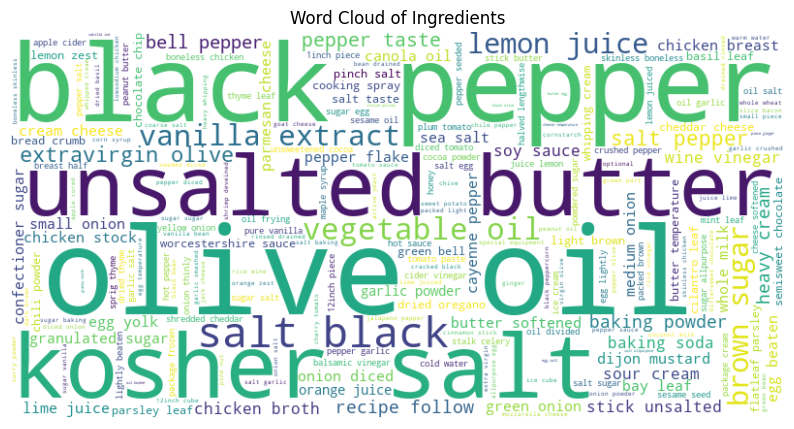

In [60]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# concat all standardized ingredients into a single text

text_data = " ".join(standardized_ingredients)

# create WordCloud

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text_data)

# display WordCloud

plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Ingredients')
plt.show()

### Top 10 Most Frequently Appearing Ingredient

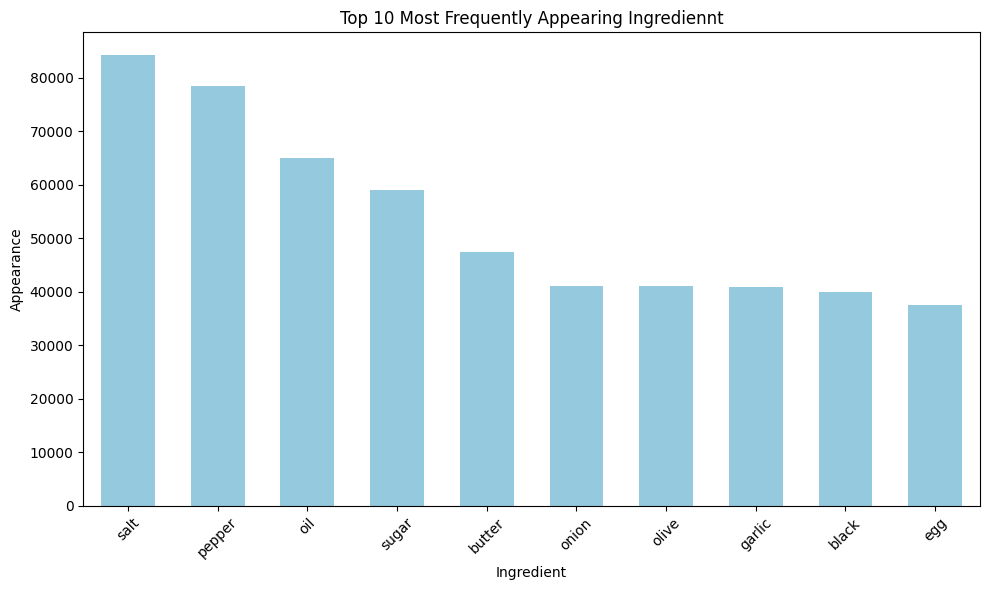

In [61]:
from collections import Counter
import seaborn as sns

# compute frequency of words

word_freq = Counter(" ".join(standardized_ingredients).split())

# sort them from highest to lowest

sorted_word_freq = dict(sorted(word_freq.items(), key = lambda item: item[1], reverse = True))

# define number of most frequent words to appear in plot

top_number = 10

# get top words and their frequencies

top_words = pd.Series(list(sorted_word_freq.keys())[:top_number])
top_frequency = pd.Series(list(sorted_word_freq.values())[:top_number])

# plotting code

plt.figure(figsize = (10, 6))
sns.barplot(x = top_words, y = top_frequency, color = 'skyblue', width = 0.6)
plt.xticks(rotation = 45)
plt.xlabel('Ingredient')
plt.ylabel('Appearance')
plt.title('Top {} Most Frequently Appearing Ingrediennt'.format(top_number))
plt.tight_layout()
plt.show()

### Top 10 Max Ingredient Recipes

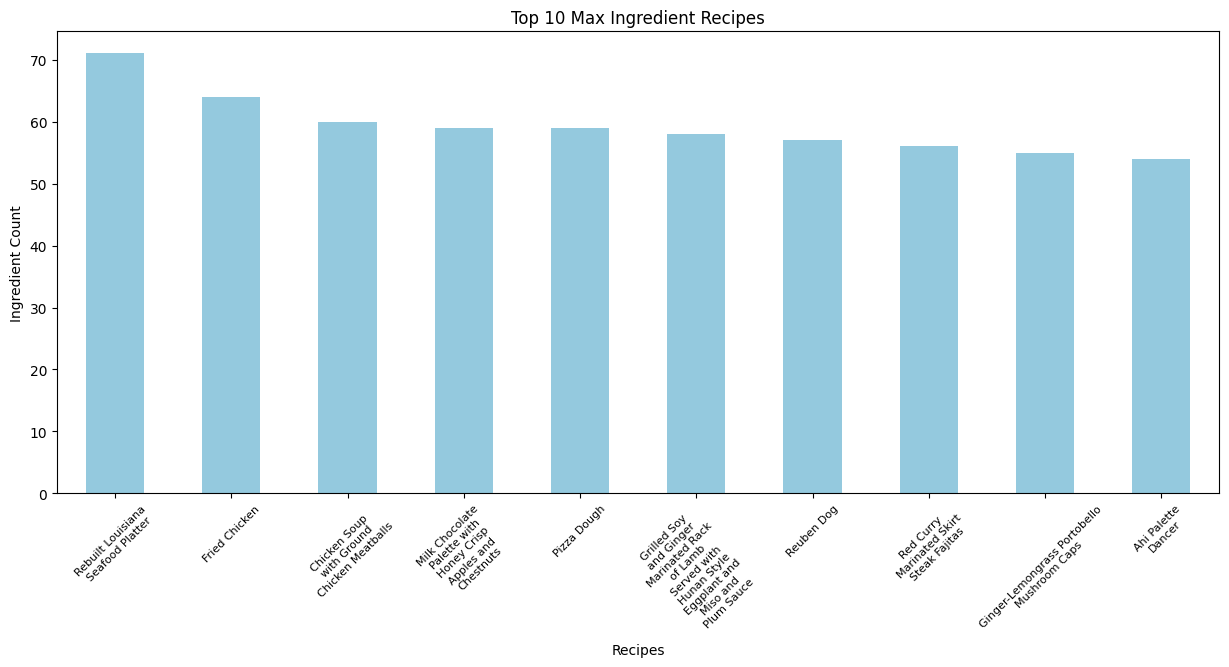

In [62]:
# max ingredient recipes bar chart

def wrap_text(sentence, n = 2):                                                     # define function to wrap the recipe titles
    words = sentence.split()
    ret = ''
    for i in range(0, len(words), n):
        ret += ' '.join(words[i:i+n]) + '\n'
    return ret.strip()                                                              # remove any trailing newlines

# sort df_clean to get the top 10 recipes by ingredient count

df_plot = df_clean.sort_values(by = 'ingredient_item', ascending = False).head(11)  # added an extra recipe because df_plot includes fried chicken twice

# apply the wrap_text function to the titles for plotting

df_plot['wrapped_text'] = df_plot['title'].apply(lambda x: wrap_text(x))

# reset index to ensure proper alignment in the plot

df_plot = df_plot.reset_index(drop = True)

# plotting code

plt.figure(figsize = (15, 6))
sns.barplot(data = df_plot, x = 'wrapped_text', y = 'ingredient_item', errorbar=None, color = 'skyblue', width = 0.5)
plt.xlabel('Recipes')
plt.ylabel('Ingredient Count')
plt.xticks(rotation = 45, fontsize = 8)
plt.title('Top 10 Max Ingredient Recipes')
plt.show()

## Text Similarity Based Recommendations

In [63]:
# add all the text from 'title', 'items' & 'instructions' together so that the recommendation system can improve its searches based on inputs like recipe name or some ingredients

all_text = df_clean['title'] + ' ' + df_clean['items'] + ' ' + df_clean['instructions']

In [64]:
# runs for ~4 mins 40 secs

cleaned_ver = standardize_text(all_text)

In [65]:
# convert the standardized text into a dataframe

df_all = pd.DataFrame(cleaned_ver)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121626 entries, 0 to 121625
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       121626 non-null  object
dtypes: object(1)
memory usage: 950.3+ KB


In [66]:
# name the column named "0" to be "combined_text"
df_all = df_all.rename(columns = {0: 'combined_text'})

In [67]:
df_all.head()

,combined_text
0,slow cooker chicken dumpling butter package refrigerated biscuit dough torn piece condensed cream chicken soup onion diced skinless boneless chicken breast half place chicken butter soup onion slow cooker fill enough water cover cover cook hour high minute serving place torn biscuit dough slow cooker cook dough longer raw center
1,awesome slow cooker pot roast pot roast water condensed cream mushroom soup package onion soup mix slow cooker mix cream mushroom soup onion soup mix water place pot roast slow cooker coat soup mixture cook high setting hour low setting hour
2,brown sugar meatloaf ginger crushed saltine cracker crumb egg small onion lean beef packed brown sugar salt ketchup black pepper milk preheat oven degree f degree c lightly grease 5x9 loaf pan press brown sugar bottom prepared loaf pan spread ketchup sugar mixing bowl mix thoroughly remaining ingredient shape loaf place top ketchup bake preheated oven hour juice clear
3,best chocolate chip cooky vanilla extract hot water semisweet chocolate chip egg walnut baking soda sugar packed brown sugar allpurpose salt butter softened preheat oven degree f degree c cream together butter sugar brown sugar smooth beat egg one time stir vanilla dissolve baking soda hot water add batter along salt stir chocolate chip nut drop spoonful onto ungreased pan bake minute preheated oven edge nicely browned
4,homemade mac cheese casserole reducedfat cream cheese cubed softened black pepper butter divided reynolds wrap® non stick aluminum foil salt milk garlic cheddar cheese shredded allpurpose fine italianseasoned bread crumb whole wheat rotini pasta broccoli floret medium onion preheat oven degree f line 2quart casserole dish reynolds wrapr pan lining paper parchment side need grease dish cook pasta saucepan according package direction adding broccoli last minute cooking drain return saucepan set aside cook onion garlic hot butter skillet minute tender stir salt black pepper add milk cook stir medium heat slightly thickened bubbly add cheddar cheese cream cheese stirring pour cheese sauce pasta broccoli stir well combined melt remaining butter mix bread crumb small bowl transfer pasta mixture prepared casserole dish top buttery bread crumb bake uncovered minute bubbly internal temperature degree f let stand minute serving


### TFIDF Vectorization & Cosine Similarity

In [68]:
# converts the column data into a Python list in the variable called combined text

combined_text = df_all['combined_text'].tolist()

In [69]:
# function to find and return the first five rows with numeric values in the 'combined_text' df in order to spot tokens like '5x9', '2quart', '8x12inch' etc.

def get_first_five_rows_with_numbers(df):
    numeric_row_indices = []
    pattern = re.compile(r'\d')                                 # matches any digit from 0-9
    for index, row in df.iterrows():
        if pattern.search(row['combined_text']):
            numeric_row_indices.append(index)
        if len(numeric_row_indices) == 5:
            break
    return df.iloc[numeric_row_indices]
first_five_numeric_rows = get_first_five_rows_with_numbers(df_all)
first_five_numeric_rows.head()

,combined_text
2,brown sugar meatloaf ginger crushed saltine cracker crumb egg small onion lean beef packed brown sugar salt ketchup black pepper milk preheat oven degree f degree c lightly grease 5x9 loaf pan press brown sugar bottom prepared loaf pan spread ketchup sugar mixing bowl mix thoroughly remaining ingredient shape loaf place top ketchup bake preheated oven hour juice clear
4,homemade mac cheese casserole reducedfat cream cheese cubed softened black pepper butter divided reynolds wrap® non stick aluminum foil salt milk garlic cheddar cheese shredded allpurpose fine italianseasoned bread crumb whole wheat rotini pasta broccoli floret medium onion preheat oven degree f line 2quart casserole dish reynolds wrapr pan lining paper parchment side need grease dish cook pasta saucepan according package direction adding broccoli last minute cooking drain return saucepan set aside cook onion garlic hot butter skillet minute tender stir salt black pepper add milk cook stir medium heat slightly thickened bubbly add cheddar cheese cream cheese stirring pour cheese sauce pasta broccoli stir well combined melt remaining butter mix bread crumb small bowl transfer pasta mixture prepared casserole dish top buttery bread crumb bake uncovered minute bubbly internal temperature degree f let stand minute serving
5,banana banana bread butter baking soda mashed overripe banana allpurpose brown sugar salt egg beaten preheat oven degree f degree c lightly grease 9x5 loaf pan bowl combine baking soda salt separate bowl cream together butter brown sugar stir egg mashed banana well blended stir banana mixture mixture stir moisten pour batter prepared loaf pan bake preheated oven minute toothpick inserted center loaf come clean let bread cool pan minute turn onto wire rack
6,chef john fisherman pie sauce rest russet potato chunk lemon juiced allpurpose butter butter chive garnish spinach pinch cayenne pepper taste boneless cod fillet salt black pepper taste potato crust pinch nutmeg olive oil lemon zest cold milk divided garlic milk baby spinach leaf bring saucepan salted water boil add russet potato boiling water cook tender minute drain well mash butter thoroughly combined season nutmeg salt black pepper cayenne pepper taste mash milk potato mixture smooth drizzle olive oil dutch oven mediumhigh heat add spinach season big pinch salt cook stirring occasionally spinach ha wilted minute transfer bowl lined paper towel wick away excess moisture heat butter saucepan medium heat whisk mixture smooth paste cook stirring constantly mixture ha nutty smell slightly browned minute add garlic whisk fragrant second whisk cold milk mixture cook thickened whisk remaining milk lemon zest bring sauce gentle simmer whisking constantly season salt turn heat low keep sauce warm preheat oven degree f degree c grease 8x12inch casserole dish butter season buttered pan salt black pepper cayenne pepper lay boneless cod fillet pan single layer season top fillet salt black pepper cayenne pepper spread spinach evenly fish drizzle lemon juice spoon sauce spinach give casserole dish several tap shake eliminate bubble drop mashed potato heaping spoonful casserole spread smoothly cover place dish onto rimmed baking sheet catch spill bake preheated oven bubbling minute turn oven broiler broil potato crust ha golden brown top minute fish flake easily let stand minute serving garnish sprinkle chive
10,downeast maine pumpkin bread cinnamon nutmeg pumpkin puree sugar water egg ginger allpurpose baking soda vegetable oil salt preheat oven degree f degree c grease three 7x3 loaf pan bowl mix together pumpkin puree egg oil water sugar well blended separate bowl whisk together baking soda salt cinnamon nutmeg ginger stir ingredient pumpkin mixture blended pour prepared pan bake minute preheated oven loaf done toothpick inserted center come clean


In [70]:
# set minimum document frequency to 5, so that a word must appear in at least 5 different documents to be included in the TF-IDF matrix

from sklearn.feature_extraction.text import TfidfVectorizer

# initialize TFIDF vectorizer

tfidf_vectorizer = TfidfVectorizer(lowercase = True, min_df = 5)

# apply TFIDF vectorization to the 'combined_text' list to transform it into a matrix of TFIDF features

tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

In [71]:
# it seems that we have 13658 unique terms or features that appeared in at least 5 documents across our vectorized 'combined_text' df

tfidf_words = tfidf_vectorizer.get_feature_names_out()
print(tfidf_matrix.shape)               # (121623, 13658)
print(len(tfidf_words))

(121626, 13658)
13658


In [72]:
# inspect numerical features that consist of all digits in our df after applying the vectorizer

def first_five_numerical_features(feature_names):
    numerical_features = [feature for feature in feature_names if feature.isdigit()]
    return numerical_features[:5]

first_five_numbers = first_five_numerical_features(tfidf_words)
print(first_five_numbers)

['10', '100', '105', '105115', '11']


In [73]:
# inspect numerical word features in our df after applying the vectorizer

def first_five_numerical_word_features(feature_names):
    pattern = re.compile(r'\d+[a-zA-Z]+')                   # matches one or more digits (0-9) followed by one or more alphabetical characters
    numerical_word_features = [feature for feature in feature_names if pattern.match(feature)]
    return numerical_word_features[:5]
first_five_numword_features = first_five_numerical_word_features(tfidf_words)
print(first_five_numword_features)

['05g', '0dv', '0g', '0mg', '0percent']


In [74]:
# define a function that returns items which match a regex pattern that looks for numbers, followed by a fraction and/or letters, capturing common units like '05g' or '3/4cup'.

def find_items_with_patterns(item_list, pattern):
    matching_items = []
    for item in item_list:
        if re.search(pattern, item):
            matching_items.append(item)
    return matching_items

# Define a regex pattern to match numbers possibly followed by fractions and/or words (e.g., '2/3cup')

pattern = r'\d+(?:\/\d+)?(?:[a-z°°]+)?'
matching_items = find_items_with_patterns(combined_text, pattern)

In [75]:
# inspect first 3 items matching the above regex pattern

first_three_matching_items = matching_items[:3]
print("First 3 matching items:", first_three_matching_items)

First 3 matching items: ['brown sugar meatloaf ginger crushed saltine cracker crumb egg small onion lean beef packed brown sugar salt ketchup black pepper milk preheat oven degree f degree c lightly grease 5x9 loaf pan press brown sugar bottom prepared loaf pan spread ketchup sugar mixing bowl mix thoroughly remaining ingredient shape loaf place top ketchup bake preheated oven hour juice clear', 'homemade mac cheese casserole reducedfat cream cheese cubed softened black pepper butter divided reynolds wrap® non stick aluminum foil salt milk garlic cheddar cheese shredded allpurpose fine italianseasoned bread crumb whole wheat rotini pasta broccoli floret medium onion preheat oven degree f line 2quart casserole dish reynolds wrapr pan lining paper parchment side need grease dish cook pasta saucepan according package direction adding broccoli last minute cooking drain return saucepan set aside cook onion garlic hot butter skillet minute tender stir salt black pepper add milk cook stir med

In [76]:
# custom tokenizer that preprocesses text by splitting it into tokens, modifying those that end with numbers, removing those that match specific measurement patterns & excluding those that fit numeric patterns

def custom_tokenizer(text):
    tokens = text.split()                                                                                   # split text into tokens based on whitespace
    tokens = [re.sub(r'\d+$', '', token) for token in tokens]                                               # remove trailing digits from each token (e.g., 'version2' becomes 'version')
    tokens = [token for token in tokens if not re.match(r'^\d+[A-Za-z]+\d+$', token)]                       # exclude tokens that are purely measurement patterns
    filtered_tokens = [token for token in tokens if not re.match(r'\d+(?:\/\d+)?(?:[a-z°°]+)?', token)]     # filter tokens excl. those matching numeric patterns, with fractions or units e.g., '300g', '1/2cup'
    return filtered_tokens

# initialize the TFIDF vectorizer with the custom tokenizer & additional configurations & limit the number of features to the top 50,000 by term frequency across the corpus

tfidf_vectorizer = TfidfVectorizer(tokenizer = custom_tokenizer, lowercase = True, max_features = 50000)

# re-apply TFIDF vectorization to the 'combined_text' list to transform it into a matrix of TFIDF features

tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

c:\Users\xiang\Downloads\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [77]:
# extract feature names from the TFIDF vectorizer and inspect the shape of the TFIDF matrix

tfidf_words = tfidf_vectorizer.get_feature_names_out()
print(tfidf_matrix.shape)
print(len(tfidf_words))

(121626, 50000)
50000


In [78]:
# example 1: inspect a specific document by printing top 10 terms with highest TFIDF scores in the 1st doc, where high TFIDF scores indicate terms that are important or unique within the entire df

doc_id = 0
doc_features = tfidf_matrix[doc_id, :].toarray().flatten()
feature_scores = pd.Series(doc_features, index = tfidf_words)
print(feature_scores.sort_values(ascending = False).head(10))

cooker       0.428183
slow         0.391171
chicken      0.314430
biscuit      0.309002
dough        0.277250
torn         0.272574
soup         0.212897
dumpling     0.181858
raw          0.136882
condensed    0.136601
dtype: float64


In [79]:
# example 2: asses the importance of a specific term in the df by printing the avg TFIDF score for tany term, where the score shows the term's overall significance and frequency within the df

if 'recipe' in tfidf_words:
    recipe_index = list(tfidf_words).index('recipe')
    recipe_scores = tfidf_matrix[:, recipe_index].toarray().flatten()
    print(f"Average TF-IDF score for 'recipe': {recipe_scores.mean()}")

Average TF-IDF score for 'recipe': 0.0078273935955931


#### User Input Vectorization Using TF-IDF Matrix Similarity

In [80]:
# assuming tfidf vectorizer and tfidf matrix are already defined, preprocess user input (as necessary)

user_input = 'pasta, spaghetti, tomato, bacon, onion'

In [81]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# function to calculate cosine similarity between a user input vector and recipe vectors

def calculate_similarity(user_input_vector, recipe_matrix):
    return cosine_similarity(user_input_vector, recipe_matrix)

def find_recipes(user_input):

    # Generate the user input vector using the TFIDF model
    user_input_vector = tfidf_vectorizer.transform([user_input])

    # Calculate similarity between user input vector and recipe vectors
    similarities = calculate_similarity(user_input_vector, tfidf_matrix )
    return similarities

similarities = find_recipes(user_input)

In [82]:
# return the array indices with the largest cosine similarities in ascending order

np.argsort(similarities)

array([[60812, 73317, 73316, ..., 56919, 63626, 90781]], dtype=int64)

In [83]:
# return the indices where index is 60811

np.where(df_clean.index == 60811)

(array([60690], dtype=int64),)

In [84]:
#resetting index from df_clean since we dropped some rows while preprocessing

df_clean = df_clean.reset_index(drop = True)

In [85]:
# sort the recipes based on similarity and get top 5 recommendations

top_n = 5
top_indices = np.argsort(similarities[0])[::-1][:top_n]
top_recipes = [df_clean['title'][i] for i in top_indices]

print(f"Top {top_n} Recipe Recommendations:")
for i, recipe in enumerate(top_recipes, 1):
    print(f"{i}. {recipe}")

Top 5 Recipe Recommendations:
1. "Really" Onion Dip for Chips
2. Thanksgiving Stuffed Onions 
3. Baked Onions with Thyme 
4. Thanksgiving Stuffed Onions
5. Green Beans and Roasted Red Onions 


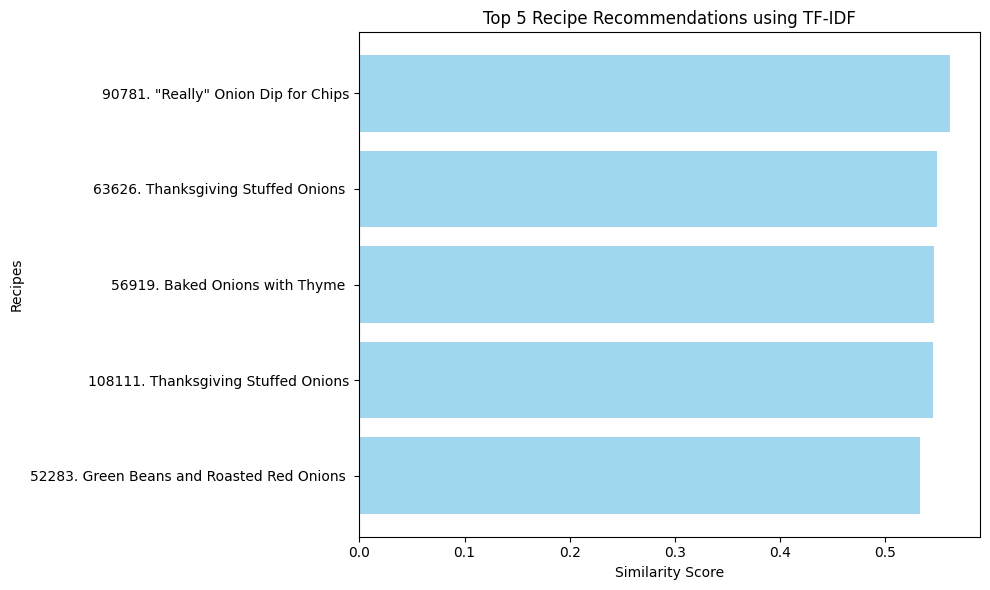

In [86]:
# plot the top 5 recipe recommendations

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(range(top_n), similarities[0][top_indices], color='skyblue', alpha=0.8)
ax.invert_yaxis()
ax.set_yticks(range(top_n))
ax.set_yticklabels([f"{i}. {df_clean['title'][i]}" for i in top_indices])
ax.set_xlabel('Similarity Score')
ax.set_ylabel('Recipes')
ax.set_title(f"Top {top_n} Recipe Recommendations using TF-IDF")
plt.tight_layout()
plt.show()

In [87]:
# printing out everything for the top 5 recommendations

df_clean.loc[top_indices, ['title', 'items', 'instructions']]

,title,items,instructions
90781,"""Really"" Onion Dip for Chips","2 scallions (white and green), minced; Freshly ground black pepper; Hot sauce, as needed; 2 cups mayonnaise; 2 teaspoons kosher salt; 1 cup plus 2 tablespoons extra-virgin olive oil; 1 tablespoon white wine vinegar; 3 medium onions, 2 left in their skin, and 1 peeled; 1/2 cup sour cream","Preheat the oven to 425 degrees F. In a roasting pan, rub the 2 onions in their skins with the 2 tablespoons oil. Bake until squishy soft, turning them once, about 45 minutes. Set aside to cool completely. Peel the onions and set aside. Meanwhile, finely dice the remaining onion. Preheat a large, heavy-bottomed skillet over medium-high heat. Add the remaining 1 cup oil and heat until hot. Add the diced onion and cook, stirring occasionally, until the onions just begin to lightly brown, about 5 minutes. Lower the heat to medium-low and continue to cook, stirring occasionally, until golden brown, about 18 minutes more. Strain the onions through a sieve over a bowl. Transfer the onions to a paper towel-lined plate and spread them into a single layer. Reserve 1/4 cup of the onion oil and let it cool completely. (Reserve the remaining oil for dressings or marinades.) Puree the roasted onions in a food processor. Add the mayonnaise, sour cream, vinegar, and salt, and pulse until smooth. While the motor is running, drizzle in the 1/4 cup of the reserved onion oil until incorporated. Season with pepper and hot sauce, to taste. Transfer the onion dip to a serving bowl and stir in the scallion. Refrigerate until very thick, about 3 hours or overnight. When ready to serve top with the fried onions. Serve with chips."
63626,Thanksgiving Stuffed Onions,1/2 cup turkey gravy or chicken broth; 1/4 cup heavy cream; 6 tablespoons cranberry sauce; 1 cup cooked turkey stuffing; 1/2 teaspoon sugar; 1 1/3 cups mashed potatoes; 2 cups chopped cooked turkey; 1/4 cup chicken broth; 4 large onions (about 3/4 pound each),"Cut the top 1/2 inch from each onion, peel the onions, and with a melon-ball cutter scoop out the centers, reserving the onion pieces, leaving 2 layers of onion or 1/3-inch-thick shells, and leaving the bottoms slightly thicker. Transfer the reserved onion pieces to a 13- by 9-inch glass baking dish, drizzle the broth over them, and arrange the onion shells, inverted on top. Cover the dish tightly with foil and bake the onions in the middle of preheated 425°F. oven for 45 to 50 minutes, or until the shells are just tender. Remove and reserve the shells, into the onion pieces stir the cream, the sugar, and salt and pepper to taste, and bake the mixture, uncovered, in the 425°F. oven, stirring occasionally, for 25 minutes. While the creamed onions are baking, in each reserved onion shell layer 1/4 cup of the stuffing, 1 1/2 tablespoons of the cranberry sauce, and another 1/4 cup of the turkey and holding each shell in one hand pack the layers lightly. Arrange the stuffed onions on top of the baked creamed onions and pour 2 tablespoons of the gravy into each stuffed onion. Top each stuffed onion with 1/3 cup of the mashed potatoes, mounding them and scoring them with a fork, and bake the onions in the 425°F. oven, stirring the creamed onions occasionally, for 35 to 40 minutes, or until the potatoes are golden. Cut the top 1/2 inch from each onion, peel the onions, and with a melon-ball cutter scoop out the centers, reserving the onion pieces, leaving 2 layers of onion or 1/3-inch-thick shells, and leaving the bottoms slightly thicker. Transfer the reserved onion pieces to a 13- by 9-inch glass baking dish, drizzle the broth over them, and arrange the onion shells, inverted on top. Cover the dish tightly with foil and bake the onions in the middle of preheated 425°F. oven for 45 to 50 minutes, or until the shells are just tender. Remove and reserve the shells, into the onion pieces stir the cream, the sugar, and salt and pepper to taste, and bake the mixture, uncovered, in the 425°F. oven, 

### Word2Vec Embedding

In [88]:
# let us remove the words/tokens from our text before feeding it to word2vec model

def remove_patterns(list_text):
    text_wo_pattern_lst=[]
    for text in list_text:
        tokens = text.split()
        tokens= [re.sub(r'\d+$', '', token) for token in tokens]
        # Filter out measurement patterns
        tokens= [token for token in tokens if not re.match(r'^\d+[A-Za-z]+\d+$', token)]
        filtered_tokens = [token for token in tokens if not re.match(r'\d+(?:\/\d+)?(?:[a-z°°]+)?', token)]

        filtered_text=" ".join(filtered_tokens)
        text_wo_pattern_lst.append(filtered_text)

    return text_wo_pattern_lst

In [89]:
# run the function on our list combined_text

clean_text_lst = remove_patterns(combined_text)

In [90]:
# find the length of the cleaned list

len(clean_text_lst)

121626

In [91]:
import gensim
from gensim.models import Word2Vec

# all_tokens = word_tokenize(cleaned_ver) - runs for ~50 secs

all_tokens=[]
for i in clean_text_lst:
    all_tokens.append(word_tokenize(i))

In [92]:
# train Word2Vec model (runs for ~45 seconds)

w2v_model = Word2Vec(sentences = all_tokens, vector_size = 100, window = 5, min_count = 1, workers = 4)

In [93]:
# show the word vector representation of the word fillet

w2v_model.wv['fillet']

array([ 1.4798223 , -0.6414489 , -1.618942  , -0.16724613, -2.0710428 ,
        0.6217305 , -2.0717335 , -2.3081198 ,  0.0868813 ,  0.49421638,
       -1.8162217 , -2.865477  , -1.6241862 ,  3.8527808 ,  2.3778994 ,
       -3.9489036 , -2.8234909 , -0.6033545 , -1.9611754 ,  0.39402035,
        0.3680448 , -4.211691  ,  1.5591649 ,  0.8089165 , -3.4456537 ,
        1.0927494 ,  0.71648693, -2.5485053 ,  1.465898  ,  2.7066295 ,
        2.2309234 , -0.19731848,  3.095664  ,  0.08708779,  4.102809  ,
       -1.3211211 , -0.13642527, -1.4076254 ,  3.2673635 , -2.8459325 ,
        0.08969916,  1.3127818 ,  1.1100415 ,  0.02846491, -3.1071434 ,
        3.1230178 ,  0.5639669 , -1.7960165 , -2.159433  , -2.6716905 ,
       -0.5383167 , -1.7466128 , -2.954584  ,  2.6007383 , -2.3637595 ,
        0.4009393 ,  1.422878  ,  1.3234073 ,  1.4332354 ,  1.2900529 ,
       -0.23063917,  2.0227346 , -2.2558672 ,  1.2497922 ,  1.5730128 ,
       -2.0907645 , -1.6792762 ,  1.3405929 ,  0.4895668 , -1.44

In [94]:
# find the length of the list of all the tokenized words

len(all_tokens)

121626

In [95]:
# find words most similar to beef and return a list of these words and their cosine similarities

w2v_model.wv.most_similar('beef')

[('chuck', 0.6815232634544373),
 ('pork', 0.6813496351242065),
 ('venison', 0.6741157174110413),
 ('oxtail', 0.6341867446899414),
 ('brisket', 0.6236254572868347),
 ('sirloin', 0.6225908398628235),
 ('veal', 0.6209647059440613),
 ('lamb', 0.6018757820129395),
 ('bison', 0.5834445953369141),
 ('meat', 0.564417839050293)]

In [96]:
# find the number of unique words

len(w2v_model.wv.index_to_key)

50440

#### User Input Vectorization Using Average Word Vector

In [97]:
# Generate user input vector

user_input = 'pasta, spaghetti, tomato, bacon, onion'

# user_input = standardize_text(user_input)

user_input_tokens = word_tokenize(user_input)

# Initialize an empty user input vector

user_input_vector = [0] * w2v_model.vector_size

# Calculate the mean vector of the user input tokens

num_tokens = 0
for token in user_input_tokens:
    if token in w2v_model.wv:
        user_input_vector = [a + b for a, b in zip(user_input_vector, w2v_model.wv[token])]
        num_tokens += 1

if num_tokens > 0:
    user_input_vector = [x / num_tokens for x in user_input_vector]

In [98]:
# runs for ~5 min 45 secs
# initialize a list of 0s with a length equal to the number of elements in each word vector
recipe_vector= [0] *w2v_model.vector_size

# initialize an empty list that will store the mean vector of each recipe
all_recipes_vector=[]
for i in all_tokens:
   # Calculate the mean vector of each recipe
    num_tokens = 0
    for token in i:
        if token in w2v_model.wv:
            recipe_vector = [a + b for a, b in zip(recipe_vector, w2v_model.wv[token])]
            num_tokens += 1

    if num_tokens > 0:
        recipe_vector = [x / num_tokens for x in recipe_vector]
    all_recipes_vector.append(recipe_vector)

In [99]:
# converts the list to an array

all_recipes_vector = np.array(all_recipes_vector)

In [100]:
# rehapes the vector into a 2-dimensional array

user_input_vector = np.array(user_input_vector).reshape(1, -1)

# Calculate cosine similarity between user input and all recipes

similarities2 = cosine_similarity(user_input_vector, all_recipes_vector)

# Recommend top recipes
# Get the indices of top N similar recipes

N = 5
top_indices2 = similarities2.argsort()[0][-N:][::-1]

# Print the top N recommended recipes

for idx in top_indices2:
    print(df_clean['title'][idx])

Nadine's - Na's Pasta
Mediterranean Farfalle
Nadine's - Na's Pasta
Spicy Pizza Soup
Farfalle with Tomatoes and Feta Cheese 


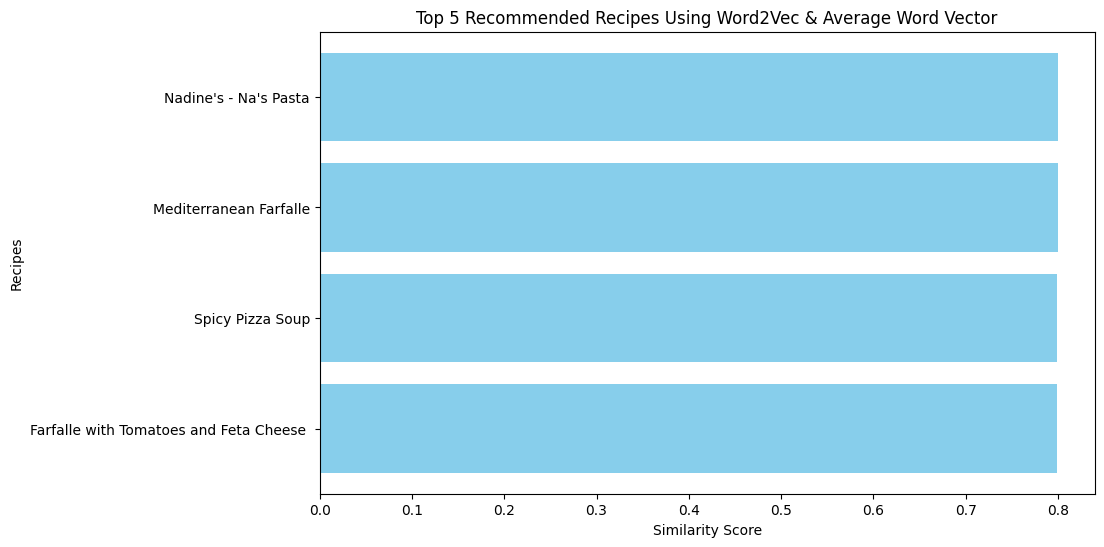

In [101]:
top_recipes = [df_clean['title'][idx] for idx in top_indices2]
similarity_scores = [similarities2[0][idx] for idx in top_indices2]

# plot the top 5 recipe recommendations
plt.figure(figsize=(10, 6))
plt.barh(top_recipes, similarity_scores, color='skyblue')
plt.xlabel('Similarity Score')
plt.ylabel('Recipes')
plt.title(f'Top {N} Recommended Recipes Using Word2Vec & Average Word Vector')
plt.gca().invert_yaxis()  
plt.show()

In [102]:
# select everything for the top 5 recommended recipes

df_clean.loc[top_indices2, ['title', 'items', 'instructions']]

,title,items,instructions
118208,Nadine's - Na's Pasta,"3 cups marinara sauce; Grated Asiago cheese, for garnish; 3 red peppers, chopped; Three 1-inch-thick slices capicolla, cubed; 1 onion, chopped; 1 1/2 pounds bulk hot Italian sausage; 1 1/2 pounds trio pasta (combination of shells, fusilli and penne rigate); 3 tomatoes, diced; Salt and pepper; Three 1-inch-thick slices salami, cubed; Garlic bread or Italian butter bread, for serving","Saute the hot Italian sausage and drain off all of the fat. Add the sausage, salami, capicolla, tomatoes, onion and red peppers to the saute pan and mix well. Add salt and pepper, to taste. Preheat the oven to 350 degrees F. Cook the pasta in boiling water until al dente. Drain and set aside. In a large oven-safe dish, combine the pasta, sausage mixture and marinara sauce. Cover and bake for 30 minutes. Plate and top with fresh Asiago cheese. Serve with garlic bread or Italian butter bread."
17702,Mediterranean Farfalle,"1/2 cup pine nuts; 3/8 cup red wine; 1 pound chorizo sausage, crumbled; 1/2 cup olive oil; 1/2 cup grated Parmesan cheese; 2 cloves garlic, minced; 1 cup diced tomato; 1/4 cup fresh basil leaves, cut into thin strips; 1 (12 ounce) package farfalle pasta","Cook pasta in salted, boiling water until al dente. While the pasta is cooking, brown ham over medium heat. Add nuts and brown them also; do not burn! Add garlic, and remove from heat. Drain pasta. In a large bowl, toss together pasta, ham mixture, basil, cheese, and tomatoes. Whisk together olive oil and vinegar; pour over pasta, and toss. Serve."
104340,Nadine's - Na's Pasta,"3 cups marinara sauce; Grated Asiago cheese, for garnish; 3 red peppers, chopped; Three 1-inch-thick slices capicolla, cubed; 1 1/2 pounds bulk hot Italian sausage; 1 onion, chopped; 1 1/2 pounds trio pasta (combination of shells, fusilli and penne rigate); 3 tomatoes, diced; Salt and pepper; Three 1-inch-thick slices salami, cubed; Garlic bread or Italian butter bread, for serving","Saute the hot Italian sausage and drain off all of the fat. Add the sausage, salami, capicolla, tomatoes, onion and red peppers to the saute pan and mix well. Add salt and pepper, to taste. Preheat the oven to 350 degrees F. Cook the pasta in boiling water until al dente. Drain and set aside. In a large oven-safe dish, combine the pasta, sausage mixture and marinara sauce. Cover and bake for 30 minutes. Plate and top with fresh Asiago cheese. Serve with garlic bread or Italian butter bread."
11143,Spicy Pizza Soup,"3 green bell peppers, chopped; 3 cups crushed tomatoes with garlic; 4 cups water; 1 pound pepperoni sausage, sliced; 1 3/8 pounds hot Italian sausage, sliced; 2 cups shredded mozzarella cheese; 2 cups chopped fresh mushrooms; 1 (15 ounce) can tomato sauce; 1 (6 ounce) can tomato paste; 1 1/2 cups uncooked elbow macaroni; 2 onions, chopped","In a large saucepan, place the hot Italian sausage, pepperoni sausage, green bell peppers, onions, mushrooms, diced tomatoes, tomato sauce, tomato paste and water. Bring to a boil. Boil 30 minutes, reduce heat and simmer 90 minutes. During the final 15 minutes of cooking, stir in the elbow macaroni. Top with mozzarella and serve."
54503,Farfalle with Tomatoes and Feta Cheese,"1 1/2 pounds farfalle or bow tie pasta; 6 roma tomatoes, seeded and diced; 3 ounces feta cheese, crumbled; 10 basil leaves, julienned; Balsamic Vinaigrette; 1/3 cup diced red onion; 1/2 cup calamata olives, pitted; 4 teaspoons drained capers","1. Cook the pasta in a large pot of boiling salted water until al dente. 2. Combine the pasta, tomatoes, olives, onions, capers, cheese, and basil. Pour on the vinaigrette and toss lightly. 1. Cook the pasta in a large pot of boiling salted water until al dente. 2. Combine the pasta, tomatoes, olives, onions, capers, cheese, and basil. Pour on the vinaigrette and toss lightly."


## Topic Modelling Based Recommendations

### Gensim Based LDA Modelling

In [103]:
# Topic modeling using Gensim based LDA on BOW - going ahead with modelling arbitary 10 topics (runs for ~10 mins 25 secs)

from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
from gensim import similarities

# Step 1: Prepare the Recipe Data

tokenized_recipes=[]
for i in clean_text_lst:
    tokenized_recipes.append(word_tokenize(i))

# Step 2: Create a Gensim Dictionary

dictionary = corpora.Dictionary(tokenized_recipes)

# Step 3: Create a Gensim Corpus

corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_recipes]

# Step 4: Train the LDA Model

num_topics = 10  # Specify the number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

In [104]:
# Step 5: Transform User Input (runs for ~1 min 40 secs)

user_input = 'pasta, spaghetti, tomato, bacon, onion'
user_input_tokens = [token for token in standardize_text(user_input)]
user_input_bow = dictionary.doc2bow(user_input_tokens)

# Step 6: Get Topic Distribution for User Input

user_topic_distribution = lda_model[user_input_bow]

# Step 7: Recommend Recipes
# Calculate similarity scores between user_topic_distribution and recipe topic distributions

index = similarities.MatrixSimilarity(lda_model[corpus])
sims = index[user_topic_distribution]

# Sort recipes by similarity scores

sorted_recipes = sorted(enumerate(sims), key=lambda item: -item[1])

# Get the top recommended recipes

top_recipes = sorted_recipes[:5]

# Print the top recommended recipe indices

print(top_recipes)

[(31689, 0.99727833), (12382, 0.9966665), (46178, 0.9959291), (55142, 0.99522966), (92108, 0.9949777)]


In [105]:
# find the indices for the top 5 recipes from top_recipes

top_recipes_index = [i[0] for i  in top_recipes]
top_recipes_index

[31689, 12382, 46178, 55142, 92108]

In [106]:
# print out the top 5 recipe recommendations 

top_recipes = [df_clean['title'][i] for i in top_recipes_index]

print(f"Top {top_n} Recipe Recommendations:")
for i, recipe in enumerate(top_recipes, 1):
    print(f"{i}. {recipe}")

Top 5 Recipe Recommendations:
1. Greek-Style Mahi Mahi
2. Tuscan Flank Steak
3. Bacon-Wrapped Trout 
4. Roasted-Pepper and Chicken Heros 
5. Biblos Grilled Tuna Nicoise


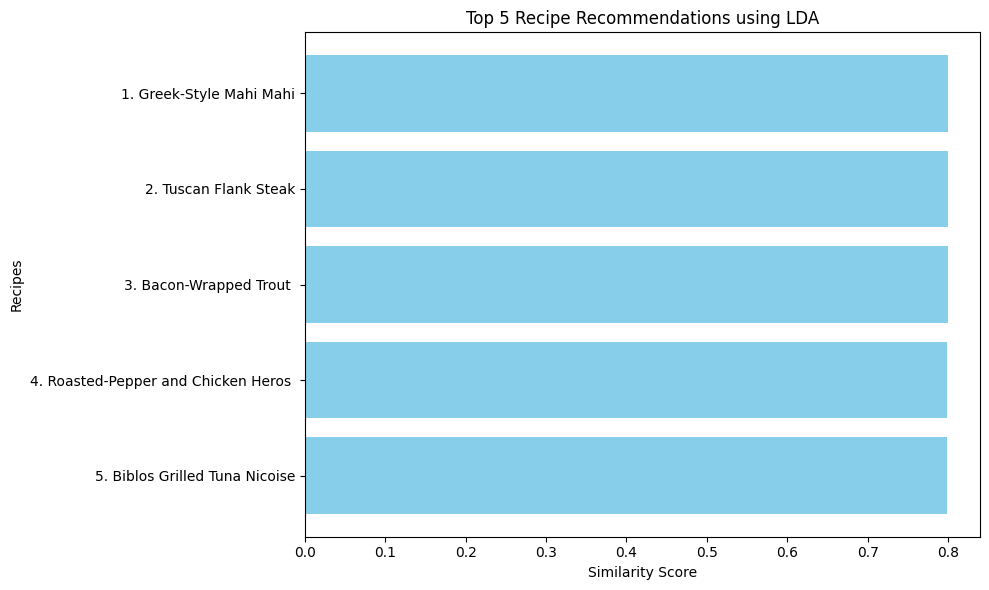

In [107]:
# plot the top 5 recipe recommendations

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), similarity_scores, color='skyblue')
plt.xlabel('Similarity Score')
plt.ylabel('Recipes')
plt.title(f'Top {top_n} Recipe Recommendations using LDA')
plt.gca().invert_yaxis()  # Invert y-axis to show highest similarity at the top

# Add recipe titles as y-axis labels
plt.yticks(range(top_n), [f"{i}. {recipe}" for i, recipe in enumerate(top_recipes, 1)])

# Show plot
plt.tight_layout()
plt.show()

In [108]:
# show everything for those top 5 recipes

df_clean.iloc[top_recipes_index]

,title,instructions,ingredient_item,items,recipe_words
31689,Greek-Style Mahi Mahi,"Rinse mahi mahi fillets and pat dry with paper towels. Prepare a marinade by stirring lemon juice, olive oil, oregano, spearmint, lemon zest, garlic, and salt together in a baking dish just big enough to accommodate the fillets without overlapping. Lay the mahi mahi fillets into the marinade. Marinate fish in the refrigerator for 30 minutes, turn, and continue marinating another 30 minutes. Preheat an outdoor grill for high heat and lightly oil the grate. Remove fillets from marinade and shake to remove excess. Discard remaining marinade. Cook fillets on hot grill, but not directly over flame, to seal in moisture, about 15 seconds per side. Reduce heat to medium and continue cooking fish away from flame until the flesh flakes easily with a fork, 12 to 15 minutes.",8,"1/3 cup olive oil; 3 tablespoons chopped fresh oregano; 3 tablespoons chopped fresh spearmint; 1/3 teaspoon garlic, minced; 1/2 cup lemon juice; 1 teaspoon lemon zest; 1/4 teaspoon salt; 4 (5 ounce) mahi mahi fillets",129
12382,Tuscan Flank Steak,"Combine 1/2 cup chopped fresh rosemary, garlic, 1/3 cup olive oil, 1/4 cup lemon juice, black pepper, 1/2 teaspoon red pepper flakes, and 1/2 teaspoon salt in a blender or food processor. Blend until smooth and set marinade aside. Pierce the steak with a fork 20 to 30 times. Place in a shallow baking dish. Pour marinade over steak and flip to coat both sides. Cover and refrigerate for 4 to 8 hours. Combine 1/3 cup olive oil, 3 tablespoons lemon juice, lemon zest, 1 teaspoon minced rosemary, 1/8 teaspoon red pepper flakes, and a pinch of salt in a jar. Cover and shake the dressing to combine. Shake again before using. Preheat an outdoor grill for medium-high heat and lightly oil the grate. Remove steak from marinade; scrape off any chunks of marinade. Discard used marinade. Season steak with salt and black pepper. Place steak on the preheated grill and cook until browned on the outside and red on the inside, about 6 to 8 minutes per side. Place 2 tablespoons of the olive oil-lemon juice dressing in a small bowl. Use rosemary sprig to baste the steak while it cooks. An instant-read thermometer inserted into the center of a steak should read 125 degrees F (52 degrees C) for rare. Remove steak to a platter and allow to rest about 6 minutes before slicing. Cut in half lengthwise, then into 1/4-inch-thick slices at an angle against the grain. Drizzle with additional dressing.",15,"3 tablespoons lemon juice; 6 cloves garlic; 1/3 cup olive oil; 1/2 teaspoon red pepper flakes; 1/2 cup chopped fresh rosemary; 1 sprig fresh rosemary; 2 teaspoons lemon zest; 1/3 cup extra virgin olive oil; 1/4 cup lemon juice; 1 teaspoon minced fresh rosemary; 1 teaspoon coarsely ground black pepper; 1 pinch salt; 1 (1 1/2-pound) flank steak, trimmed of excess fat; 1/8 teaspoon red pepper flakes; 1/2 teaspoon salt",244
46178,Bacon-Wrapped Trout,"Prepare grill for medium heat. Season trout inside and out with Four Seasons Blend. Stuff with herbs and wrap with bacon. Grill trout, turning, until bacon is crisp and a paring knife inserts easily into flesh and is warm when removed, 15-20 minutes. do ahead: Fish can be prepped 6 hours ahead. Cover and chill. Prepare grill for medium heat. Season trout inside and out with Four Seasons Blend. Stuff with herbs and wrap with bacon. Grill trout, turning, until bacon is crisp and a paring knife inserts easily into flesh and is warm when removed, 15-20 minutes. do ahead: Fish can be prepped 6 hours ahead. Cover and chill.",6,"1/4 cup fresh sage leaves, thinly sliced; 1 1/2 pound thinly sliced bacon; 6 14-16-ounce rainbow trout, butterflied, deboned; 1 bunch fresh thyme; 1 bunch fresh flat-leaf parsley; 1 tablespoon Four Seasons Blend",110
55142,Roasted-Pepper and Chicken Heros,"Rub chicken with 1 tablespoon oil, oregano, 1/4 teaspoon salt, and 1/8 teaspoon pepper and marinate at room temperature 30 minutes. Whisk together vinegar

In [109]:
# show all the topics learned by the model and their probabilities in a tuple format 

lda_model.show_topics(formatted = False)

[(0,
  [('sauce', 0.033079248),
   ('pepper', 0.03018656),
   ('onion', 0.019712083),
   ('salt', 0.0191187),
   ('garlic', 0.019073788),
   ('oil', 0.017981796),
   ('cilantro', 0.013443476),
   ('bowl', 0.013191678),
   ('chile', 0.013025499),
   ('add', 0.01267247)]),
 (1,
  [('olive', 0.045695715),
   ('oil', 0.04486518),
   ('pepper', 0.044597447),
   ('salt', 0.03777156),
   ('lemon', 0.021666717),
   ('tomato', 0.020978997),
   ('bowl', 0.017251085),
   ('garlic', 0.017016767),
   ('leaf', 0.014548956),
   ('season', 0.013666507)]),
 (2,
  [('heat', 0.043640796),
   ('oil', 0.036215622),
   ('minute', 0.02508277),
   ('cook', 0.022201896),
   ('skillet', 0.021589376),
   ('side', 0.020736713),
   ('salt', 0.01978219),
   ('egg', 0.019454086),
   ('slice', 0.015964214),
   ('pan', 0.015932733)]),
 (3,
  [('cheese', 0.052234612),
   ('oven', 0.03386282),
   ('potato', 0.028883016),
   ('bread', 0.026106037),
   ('minute', 0.022588663),
   ('degree', 0.021252891),
   ('baking', 0.0

## Testing Dataset

In [110]:
# create a test dataset with 200 random rows/suggestions

random_users = df_all.sample(n=200, random_state=42) 
random_users.head()

,combined_text
28137,quick lobster bisque tomato paste cream seafood seasoning old bay® sea salt celery dried thyme allpurpose onion celery salt halfandhalf paprika butter black pepper cooked lobster meat shredded lobster stock melt butter pot medium heat stir sea salt celery salt black pepper butter gradually stir halfandhalf mixture taking care lump form add lobster stock stir reduce heat low simmer stirring constantly soup begin thicken minute stir lobster tomato paste onion celery soup season paprika thyme seafood seasoning continue cooking soup heat onion celery minute add cream stir cook hot minute
107576,eastern style tuna nicoise salad tea marbled egg wasabi vinaigrette brined caper drained pitted kalamata olive juice lemon clear rice vinegar chinese fivespice powder light brown sugar wasabi paste small romaine lettuce heart thinly shredded crosswise chinese fivespice powder quail egg teamarbled quail egg recipe follows egg mediumboiled quartered whole star anise mirin light soy sauce peanut oil dark soy sauce light soy sauce two 8ounce ahi tuna steak cherry tomato halved light brown sugar french green bean blanched extravirgin olive oil ginger pinch sea salt pepper mixed green sea salt black tea bag light soy sauce tuna whisk together mirin ginger soy combined add tuna toss well coat marinate refrigerator hour wasabi vinaigrette whisk together soy sauce wasabi paste lemon juice small bowl smooth add oil slow steady stream whisking constantly combined season sugar salt pepper stir well salad remove tuna marinade shake excess sprinkle fivespice powder sea salt equally side heat castiron skillet flat griddle high heat add oil heat rippling sear tuna hot pan minute per side let tuna rest minute slicing thinly across grain serve divide green bean mixed green tomato teamarbled quail egg romaine plate fan tuna slice top scatter caper olive salad drizzle dressing evenly plate put quail egg small saucepan cover cold water add fivespice dark soy light soy sugar star anise tea bag heat high heat water begin bubble remove heat cover let stand minute lift egg time liquid slotted spoon crack back leaving shell return egg liquid let stand cooled chill egg liquid refrigerator least hour preferably overnight peel egg rinse briefly serving
114246,bobby world famous steak rub mesa bar americain bf steak black pepper cumin dried oregano spanish paprika coriander kosher salt mustard chile de arbol optional ancho chili powder whisk together ingredient store rub container tight fitting lid cool dark place
42267,sesame wonton triangle smoked salmon wasabi seasoned rice vinegar egg smoked salmon toasted sesame oil asian daikon radish sprout small sprout wonton wrapper wasabi paste sesame seed ginger chive preheat oven 350°f whisk oil egg small bowl blend place wonton wrapper single layer work surface brush oil mixture sprinkle half seed fold diagonally half brush oil mixture sprinkle remaining seed triangle place baking sheet bake golden minute cool whisk vinegar chive wasabi ginger oil bowl cover wonton salmon slice drizzle wasabi mixture top salmon sprout fold salmon sprout top sprout preheat oven 350°f whisk oil egg small bowl blend place wonton wrapper single layer work surface brush oil mixture sprinkle half seed fold diagonally half brush oil mixture sprinkle remaining seed triangle place baking sheet bake golden minute cool whisk vinegar chive wasabi ginger oil bowl cover wonton salmon slice drizzle wasabi mixture top salmon sprout fold salmon sprout top sprout found asian food section supermarket japanese market found asian food section supermarket japanese market found asian food section supermarket japanese market
34714,grilled king crab leg sheet aluminum foil black pepper taste sea salt taste alaskan king crab leg garlic parsley butter divided taste lemon quartered preheat grill medium heat lay sheet aluminum foil work surface place crab leg sheet squeeze lemon quarter crab leg place squeezed lemon quarter next crab leg butter sma

In [111]:
# create another df with the same seed to have the same rows but just split into different columns to extract the recipe title for later

random_users_title = df_clean.sample(n=200, random_state = 42)
random_users_title.head()

,title,instructions,ingredient_item,items,recipe_words
28137,Quick Lobster Bisque,"Melt butter in a large pot over medium heat. Stir flour, sea salt, celery salt, and black pepper into the butter. Gradually stir half-and-half into the mixture, taking care that no lumps form. Add lobster stock; stir. Reduce heat to low and simmer, stirring constantly, until the soup begins to thicken, about 15 minutes. Stir lobster, tomato paste, onion, and celery into the soup; season with paprika, thyme, and seafood seasoning. Continue cooking the soup to heat the onion and celery, about 10 minutes. Add cream; stir. Cook until hot, about 5 minutes.",15,"3 tablespoons tomato paste; 1 cup cream; 1/2 teaspoon seafood seasoning (such as Old Bay®); 1/2 teaspoon sea salt; 3 tablespoons minced celery; 1/2 teaspoon dried thyme; 6 tablespoons all-purpose flour; 3 tablespoons minced onion; 1/2 teaspoon celery salt; 4 cups half-and-half; 1 teaspoon paprika; 6 tablespoons butter; 1/4 teaspoon ground black pepper; 3 cups cooked lobster meat, shredded; 1 1/2 cups lobster stock",93
107576,Eastern Style Tuna Nicoise Salad with Tea Marbled Eggs and Wasabi Vinaigrette,"For the tuna: Whisk together the mirin, ginger and soy until combined. Add the tuna, toss well to coat, and marinate in the refrigerator for 1 hour. For the wasabi vinaigrette: Whisk together the soy sauce, wasabi paste and lemon juice in a small bowl until smooth. Add the oil in a slow, steady stream while whisking constantly until combined. Season with the sugar, salt and white pepper and stir well. For the salad: Remove the tuna from the marinade, shake off the excess and sprinkle the five-spice powder and sea salt equally over all sides. Heat a cast-iron skillet or flat griddle over high heat. Add the oil and heat until rippling, and then sear the tuna in the hot pan, 1 minute per side. Let the tuna rest for 5 minutes before slicing thinly across the grain. To serve, divide the green beans, mixed greens, tomatoes, Tea-Marbled Quail Eggs and Romaine 2 plates. Fan the tuna slices over the top, scatter the capers and olives over the salads and drizzle the dressing evenly over each plate. Put the quail eggs in a small saucepan and cover with 2 cups of cold water. Add the five-spice, dark soy, light soy, sugar, star anise and tea bags and heat over high heat until the water begins to bubble. Remove from the heat, cover and let stand for 5 minutes. Lift the eggs, a few at a time, out of the liquid with a slotted spoon and crack them all over with the back of a teaspoon, leaving the shells on. Return the eggs to the liquid and let stand until cooled. Chill the eggs in their liquid in the refrigerator for at least 1 hour, preferably overnight. Peel the eggs and rinse briefly just before serving.",28,"2 teaspoons brined capers, drained; 8 pitted kalamata olives; Juice of 1 lemon or 1/4 cup clear rice vinegar; 1/2 teaspoon Chinese five-spice powder; 1/4 teaspoon light brown sugar; 1 teaspoon wasabi paste; 1 small Romaine lettuce heart, thinly shredded crosswise; 1 teaspoon Chinese five-spice powder; 12 fresh quail eggs; 8 Tea-Marbled Quail Eggs, recipe follows, or 2 large eggs, medium-boiled and quartered; 3 whole star anise; 2 tablespoons mirin; 1 teaspoon light soy sauce; 2 tablespoons peanut oil; 1 teaspoon dark soy sauce; 2 tablespoons light soy sauce; Two 6 to 8-ounce Ahi tuna steaks; 10 cherry tomatoes, halved; 1 teaspoon light brown sugar; 8 ounces French green beans, blanched; 6 tablespoons extra-virgin olive oil; 1 tablespoon peeled grated ginger; Pinch sea salt; Freshly ground white pepper; 4 ounces mixed greens; Sea salt; 2 black tea bags; 1 tablespoon light soy sauce",296
114246,"Bobby's World Famous Steak Rub from Mesa, Bar Americain and Bf Steak","Whisk together all ingredients. Store rub in a container with a tight fitting lid in a cool, dark, place.",9,"1 tablespoon ground black pepper; 1 tablespoon ground cumin; 3 tablespoons ground dried oregano; 1/3 cup Spanish paprika; 3 tablespoon

In [112]:
# calculate cosine similarity score for all text between test dataset and entire dataset

user_recommendations = []

for index in random_users.index:

    # get the corresponding row from random_users_title
    user_row_title = random_users_title.loc[index]
    
    # extract the title from that row
    user_title = user_row_title['title']
    
    # extract the text from the single column in random_users
    user_text = random_users.loc[index, 'combined_text']
    
    # preprocess text
    cleaned_text = remove_patterns([user_text])                             # using the previously defined function above to filter out measurement text
    tokenized_text = [word_tokenize(text) for text in cleaned_text]         # tokenize the cleaned text
    
    # initialize a list of zeros with a length equal to the word vector size
    user_vector = [0] * w2v_model.vector_size
    
    # calculate the mean vector for the test dataset's text
    num_tokens = 0
    for text_tokens in tokenized_text:
        for token in text_tokens:
            if token in w2v_model.wv:
                user_vector = [a + b for a, b in zip(user_vector, w2v_model.wv[token])]
                num_tokens += 1
    if num_tokens > 0:
        user_vector = [x / num_tokens for x in user_vector]
    
    # calculate cosine similarity scores 
    similarities = cosine_similarity([user_vector], all_recipes_vector)
    
    # get indices of top N recipes
    top_indices2 = similarities.argsort()[0][-N:][::-1]
    
    # get titles of top recommended recipes
    top_recipes = [df_clean['title'][i] for i in top_indices2]
    
    # store recommendations 
    user_recommendations.append({'User': user_title, 'Recommendations': top_recipes})

recommendations_df = pd.DataFrame(user_recommendations)


In [113]:
# show the first five rows

recommendations_df.head()

,User,Recommendations
0,Quick Lobster Bisque,"[Quick Lobster Bisque, Special Lobster Bisque, Big Charlie's Gumbo, Cajun Corn and Crab Bisque, Chrissy's Crab Chowder]"
1,Eastern Style Tuna Nicoise Salad with Tea Marbled Eggs and Wasabi Vinaigrette,"[Eastern Style Tuna Nicoise Salad with Tea Marbled Eggs and Wasabi Vinaigrette, Ming's Sesame Tofu and Cucumber Salad with Soy Sauce Eggs, Wasabi Marinated Tuna with Field Greens, Grilled Ponzu-Marinated Snapper with Wasabi Oil and Soy Marinated Ginger, Sweet Chili Ginger Seared Tuna]"
2,"Bobby's World Famous Steak Rub from Mesa, Bar Americain and Bf Steak","[Bobby's World Famous Steak Rub from Mesa, Bar Americain and Bf Steak, Bobby's Spice Rub for Beef and Pork, Bobby's Rub for Beef and Pork, Cumin-Coriander Pork Rub, Bayou's Bodacious Pork Rub]"
3,Sesame Wonton Triangles with Smoked Salmon and Wasabi,"[Sesame Wonton Triangles with Smoked Salmon and Wasabi , Ahi Tuna Napoleon, Tuna and Avocado Tartare with California Caviar on Sesame Wonton Crisps , Smoked Salmon with Quail Egg, Asian Salmon Rolls]"
4,Grilled King Crab Legs,"[Grilled King Crab Legs, Alaskan Halibut, Salmon and Crab Roulade, Herb-Stuffed Whole Fish, Star Jones' Garlic Lobster Tails, Broiled Lobster Tails]"


In [114]:
# function to compute cosine similarity between two sets of ingredients
def compute_cosine_similarity(user_recipe_ingredients, recommended_recipe_ingredients):
    # transform user recipe ingredients to TF-IDF vector
    user_recipe_tfidf = tfidf_vectorizer.fit_transform([user_recipe_ingredients])
    
    # transform recommended recipe ingredients to TF-IDF vectors
    recommended_recipe_tfidf = tfidf_vectorizer.transform([recommended_recipe_ingredients])
    
    # compute cosine similarity between ingredients for user recipe and for the 5 recommended recipes
    similarity = cosine_similarity(user_recipe_tfidf, recommended_recipe_tfidf)
    
    return similarity[0][0]

# store comparisons results to print for later
comparison_results = []

# extract the ingredients of the recipe names given in the recommendations df
for index, row in recommendations_df.iterrows():
    user_recipe_name = row['User']
    recommended_recipes = row['Recommendations']
    
    for i, recommended_recipe_name in enumerate(recommended_recipes, 1):
        # get the ingredients of the user's recipe
        user_recipe_ingredients = df_clean[df_clean['title'] == user_recipe_name]['items'].values[0]
        
        # get the ingredients of the recommended recipe
        recommended_recipe_ingredients = df_clean[df_clean['title'] == recommended_recipe_name]['items'].values[0]
        
        # use the function defined above to calculate cosine similarity scores
        similarity_score = compute_cosine_similarity(user_recipe_ingredients, recommended_recipe_ingredients)
        
        # append the comparison results to the list
        comparison_results.append((user_recipe_name, recommended_recipe_name, similarity_score))


c:\Users\xiang\Downloads\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [115]:
# print in a table format

from tabulate import tabulate

headers = ['User Recipe', 'Recommended Recipe', 'Cosine Similarity for Ingredients']
print(tabulate(comparison_results, headers=headers, tablefmt='grid'))

+---------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------+-------------------------------------+
| User Recipe                                                                                 | Recommended Recipe                                                                                                              |   Cosine Similarity for Ingredients |
+=============================================================================================+=================================================================================================================================+=====================================+
| Quick Lobster Bisque                                                                        | Quick Lobster Bisque                                                                                            

## User Input

In [212]:
# Collect user input
user_input = input("Enter your preferences: ")

# Preprocess user input
cleaned_user_input = remove_patterns(user_input) 
user_input_tokenized = [word_tokenize(text_input) for text_input in cleaned_user_input]

user_vector_input = [0] * w2v_model.vector_size
    
    # Calculate the mean vector for the user's text
num_tokens_user_input = 0
for text_tokens in user_input_tokenized:
    for token in text_tokens:
        if token in w2v_model.wv:
            user_vector_input = [a + b for a, b in zip(user_vector_input, w2v_model.wv[token])]
            num_tokens_user_input += 1
if num_tokens_user_input > 0:
    user_vector_input = [x / num_tokens_user_input for x in user_vector_input]
    
# Calculate cosine similarity between user input and recipes
similarity_scores_user = cosine_similarity([user_vector_input], all_recipes_vector)

# Get indices of top N recommended recipes
top_indices2 = similarity_scores_user.argsort()[0][-N:][::-1]

top_similarity_scores = [similarity_scores_user[0][i] for i in top_indices2]

# get titles of top recommended recipes
top_recipes = [df_clean['title'][i] for i in top_indices2]
top_ingredients = [df_clean['items'][i] for i in top_indices2]
print(top_ingredients)

# Display recommendations
print("Top Recommended Recipes:")
for i, (recipe_title, similarity_score) in enumerate(zip(top_recipes, top_similarity_scores), 1):
    print(f"{i}. {recipe_title} (Cosine Similarity Score: {similarity_score})")


['1 cup white spelt flour; 2 tablespoons chopped fresh rosemary; 1 cup whole wheat flour; 1 tablespoon active dry yeast; 1 1/8 cups warm water (110 degrees F/45 degrees C); 1 cup quinoa flour; 1 teaspoon sea salt', '1 1/2 tablespoons nonfat dry milk powder; 1 1/2 teaspoons active dry yeast; 1 1/4 cups warm water (110 degrees F/45 degrees C); 3 cups whole wheat flour; 1 1/2 tablespoons margarine; 1 1/2 tablespoons white sugar; 1 1/2 teaspoons salt', '2 tablespoons soybean powder (anatomy elixir); 1 teaspoon vanilla extract; 1 teaspoon agave nectar; 1/4 cup apple juice; 3/4 cup ice; 1/2 cup milk; 3/4 cup mixed berries', '1/4 cup milk; 1 teaspoon vanilla extract; 1 teaspoon agave nectar; 2 tablespoons soybean powder (anatomy elixer); 1/2 cup coconut milk; 3/4 cup ice; 1/2 cup pineapple pieces; 1/2 banana', '1 1/4 cups warm water (110 degrees F/45 degrees C); 1/3 cup honey; 1 1/2 tablespoons instant powdered milk; 2 1/2 teaspoons active dry yeast; 2 tablespoons white sugar; 3 tablespoons m

## Conclusion

Since our model is unsupervised, we cannot add assessment scores / metrics. Nevertheless, in our 'Text Similarity Based Recommendations' section, it appears that from all the models, **Word2Vec produced the most relevant recipe recommendations** based on the 'user_input' parameter that we set across all the models.